#### Load The Result of Models

##### Load the debias models train result

In [10]:
# load result file
import pandas as pd
import numpy as np
df = pd.read_csv('../result/csv/TrainByDev.csv')
# Remove rows with duplicated values
df = df.drop_duplicates()
# drop Fusion column
df = df.drop(columns=['Fusion'])
df_init = pd.read_csv('../result/csv/init_results.csv')
df.loc[df['Ngram'] == 2, 'Stereotype'] = 'Bigram'
df.loc[df['TrainEpoch'] == 40, 'Stereotype'] = '40-Epoch-Normal'
# union df and df_init
df_init = df_init[['Base_Model','Dataset_Name','Init_F1','Init_Word_Fairness']]
df_init = df_init.rename(columns={'Init_F1':'FinalF1','Init_Word_Fairness':'FinalFairness'})
df_init['Stereotype'] = 'Init'
df_init = df_init[['Dataset_Name','Base_Model','Stereotype','FinalF1','FinalFairness']]
df = pd.concat([df, df_init])


In [11]:
# Group data by Dataset_name and Base_Model, then for each Stereotype we compare the FinalF1 and FinalFairness with Stereotype = Normal
normal = df[(df['Stereotype'] == 'Init')] 

# Merge the normal DataFrame back into the original DataFrame based on 'Dataset_Name' and 'Base_Model'
merged = pd.merge(df, normal, on=['Dataset_Name', 'Base_Model'], suffixes=('', '_Normal'))

# Calculate the difference in 'Accuracy' compared to 'Normal' stereotype
merged['Accuracy_Difference'] = merged['FinalF1'] - merged['FinalF1_Normal'] 
merged['Fairness_Difference'] = merged['FinalFairness'] - merged['FinalFairness_Normal']
merged = merged[['Dataset_Name','Base_Model','Stereotype',"FinalF1","FinalFairness","Accuracy_Difference",'Fairness_Difference']] 

In [12]:
pd.set_option('display.max_rows', None)
#sort the merged dataframe by Stereotype then Dataset_Name then Base_Model
merged = merged.sort_values(by=['Stereotype','Dataset_Name','Base_Model'])
# remove duplicate rows
merged = merged.drop_duplicates()
merged

Dataset_Name Base_Model       Stereotype   FinalF1  FinalFairness  \
63             ARC    TextCNN  40-Epoch-Normal  0.504524      41.246891   
84             ARC   TextRCNN  40-Epoch-Normal  0.516946      41.773226   
49          Amazon    TextCNN  40-Epoch-Normal  0.703330      16.183692   
19          Amazon   TextRCNN  40-Epoch-Normal  0.738298      16.149594   
56         Economy    TextCNN  40-Epoch-Normal  0.551573      19.498599   
26         Economy   TextRCNN  40-Epoch-Normal  0.537123      20.569344   
12   HyperPartisan    TextCNN  40-Epoch-Normal  0.718615      18.262161   
5    HyperPartisan   TextRCNN  40-Epoch-Normal  0.761088      17.699153   
42          SCIERC    TextCNN  40-Epoch-Normal  0.395714      37.305413   
34          SCIERC   TextRCNN  40-Epoch-Normal  0.605226      36.505452   
70         Twitter    TextCNN  40-Epoch-Normal  0.822917      18.651174   
77         Twitter   TextRCNN  40-Epoch-Normal  0.840581      18.683973   
62             ARC    TextCNN           Bigram  0.523400      41.357744   
83             ARC   TextRCNN           Bigram  0.535906      41.779726   
48          Amazon    TextCNN           Bigram  0.706340      16.215899   
17          Amazon   TextRCNN           Bigram  0.748316      16.150770   
103       ChemProt    TextCNN           Bigram  0.302311      48.969398   
117       ChemProt   TextRCNN           Bigram  0.389011      49.911164   
54         Economy    TextCNN           Bigram  0.552845      18.893564   
24         Economy   TextRCNN           Bigram  0.594596      17.488612   
11   HyperPartisan    TextCNN           Bigram  0.739374      18.262161   
3    HyperPartisan   TextRCNN           Bigram  0.763636      17.450994   
123           News    TextCNN           Bigram  0.591768      54.672432   
110           News   TextRCNN           Bigram  0.761875      55.120453   
90         Parties    TextCNN           Bigram  0.564918      13.532311   
96         Parties   TextRCNN           Bigram  0.578439      13.703102   
38          SCIERC    TextCNN           Bigram  0.394028      37.222917   
29          SCIERC   TextRCNN           Bigram  0.627576      37.147387   
69         Twitter    TextCNN           Bigram  0.808651      18.729430   
76         Twitter   TextRCNN           Bigram  0.845674      18.683973   
58             ARC    TextCNN            Idiom  0.515303      41.041940   
81             ARC   TextRCNN            Idiom  0.533658      41.709315   
45          Amazon    TextCNN            Idiom  0.709739      16.171723   
15          Amazon   TextRCNN            Idiom  0.731338      16.203866   
99        ChemProt    TextCNN            Idiom  0.302921      49.010932   
119       ChemProt   TextRCNN            Idiom  0.386621      49.870940   
52         Economy    TextCNN            Idiom  0.514974      19.648346   
22         Economy   TextRCNN            Idiom  0.578233      16.377088   
8    HyperPartisan    TextCNN            Idiom  0.735772      17.303534   
1    HyperPartisan   TextRCNN            Idiom  0.779085      18.017882   
126           News    TextCNN            Idiom  0.590613      54.668632   
114           News   TextRCNN            Idiom  0.766276      55.107524   
86         Parties    TextCNN            Idiom  0.562551      13.612640   
97         Parties   TextRCNN            Idiom  0.587694      13.576724   
41          SCIERC    TextCNN            Idiom  0.390720      37.810799   
32          SCIERC   TextRCNN            Idiom  0.617233      36.719450   
65         Twitter    TextCNN            Idiom  0.811546      18.772402   
72         Twitter   TextRCNN            Idiom  0.835565      18.683973   
106     Yelp_Hotel    TextCNN            Idiom  0.593891      23.929306   
64             ARC    TextCNN             Init  0.528883      42.036560   
85             ARC   TextRCNN             Init  0.569049      41.446255   
50          Amazon    TextCNN             Init  0.706549      16.205455   
20          Amazon   TextRCNN  

In [13]:
delta_df = merged[merged['Dataset_Name']!='Yelp_Hotel'].copy()

In [14]:
delta_df.groupby(['Stereotype']).count()

Dataset_Name  Base_Model  FinalF1  FinalFairness  \
Stereotype                                                          
40-Epoch-Normal            12          12       12             12   
Bigram                     18          18       18             18   
Idiom                      18          18       18             18   
Init                       18          18       18             18   
Normal                     18          18       18             18   
Noun                       18          18       18             18   
RandomMask                 18          18       18             18   

                 Accuracy_Difference  Fairness_Difference  
Stereotype                                                 
40-Epoch-Normal                   12                   12  
Bigram                            18                   18  
Idiom                             18                   18  
Init                              18                   18  
Normal                            18                   18  
Noun                              18                   18  
RandomMask                        18                   18

In [15]:
delta_df.rename(columns={'FinalF1':"Macro F1","FinalFairness":"Word Fairness", "Accuracy_Difference":"Delta Macro F1","Fairness_Difference":"Delta Word Fairness"}, inplace=True)
# get mean group by Stereotype and merge with std
# delta_df.groupby(['Stereotype']).mean(numeric_only=True).merge(delta_df.groupby(['Stereotype']).std(numeric_only=True), left_index=True, right_index=True, suffixes=('(mean)', '(stardard deviation))'))
mean_delta_df = delta_df.groupby(['Stereotype']).mean(numeric_only=True)
mean_delta_df

Macro F1  Word Fairness  Delta Macro F1  Delta Word Fairness
Stereotype                                                                   
40-Epoch-Normal  0.641328      25.210723       -0.020948             0.051646
Bigram           0.612704      29.738446       -0.008820            -0.166347
Idiom            0.608325      29.683762       -0.013199            -0.221032
Init             0.621524      29.904793        0.000000             0.000000
Normal           0.611535      29.914808       -0.009989             0.010015
Noun             0.606057      29.892700       -0.015466            -0.012093
RandomMask       0.611061      29.829189       -0.010463            -0.075604

In [134]:
std = delta_df.groupby(['Stereotype']).std(numeric_only=True)
std.rename(columns={'Delta Macro F1': 'Standard deviation Macro F1',"Delta Word Fairness":"Standard deviation Delta Word Fairness"}, inplace=True)
std.drop(columns=['Macro F1', 'Word Fairness'], inplace=True)
result_df = std.merge(mean_delta_df, on=['Stereotype'])
result_df.rename(columns={'Macro F1': 'Macro F1 (mean)', 'Word Fairness':'Word Fairness (mean)','Delta Macro F1':'Delta Macro F1 (mean)','Delta Macro F1':'Delta Macro F1 (mean)'
                          ,'Delta Word Fairness':'Delta Word Fairness (mean)'}, inplace=True)
result_df

Standard deviation Macro F1  \
Stereotype                                
Bigram                         0.023515   
Idiom                          0.022337   
Init                           0.023312   
Normal                         0.000000   
Noun                           0.016775   
RandomMask                     0.011395   

            Standard deviation Delta Word Fairness  Macro F1 (mean)  \
Stereotype                                                            
Bigram                                    0.773810         0.612704   
Idiom                                     1.035891         0.608325   
Init                                      0.889065         0.621524   
Normal                                    0.000000         0.611535   
Noun                                      0.357968         0.606057   
RandomMask                                0.306781         0.611061   

            Word Fairness (mean)  Delta Macro F1 (mean)  \
Stereotype                                                
Bigram                 29.738446               0.001169   
Idiom                  29.683762              -0.003211   
Init                   29.904793               0.009989   
Normal                 29.914808               0.000000   
Noun                   29.892700              -0.005478   
RandomMask             29.829189              -0.000474   

            Delta Word Fairness (mean)  
Stereotype                              
Bigram                       -0.176362  
Idiom                        -0.231047  
Init                         -0.010015  
Normal                        0.000000  
Noun                         -0.022108  
RandomMask                   -0.085619

In [131]:
# merge mean_delta and std and drop Macro F1 and Word Fariness on std


KeyError: "['Macro F1', 'Word Fairness'] not found in axis"

The Accuracy difference showed that RandomMask

# Plot the Accuracy metrics

In [52]:
# union df_init with merged
df_init = df_init[['Base_Model','Dataset_Name','Init_F1','Init_Word_Fairness']]
df_init = df_init.rename(columns={'Init_F1':'FinalF1','Init_Word_Fairness':'FinalFairness'})
df_init['Stereotype'] = 'Init'
df_init = df_init[['Dataset_Name','Base_Model','Stereotype','FinalF1','FinalFairness']]
merged = merged.append(df_init)


/tmp/ipykernel_25831/4071168662.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged.append(df_init)


In [13]:
merged

Dataset_Name Base_Model  Stereotype   FinalF1  FinalFairness  \
0             ARC    TextCNN      Bigram  0.523400      41.357744   
5             ARC   TextRCNN      Bigram  0.535906      41.779726   
10         Amazon    TextCNN      Bigram  0.706340      16.215899   
15         Amazon   TextRCNN      Bigram  0.748316      16.150770   
20       ChemProt    TextCNN      Bigram  0.302311      48.969398   
26       ChemProt   TextRCNN      Bigram  0.389011      49.911164   
31        Economy    TextCNN      Bigram  0.552845      18.893564   
36        Economy   TextRCNN      Bigram  0.594596      17.488612   
41  HyperPartisan    TextCNN      Bigram  0.739374      18.262161   
46  HyperPartisan   TextRCNN      Bigram  0.763636      17.450994   
51           News    TextCNN      Bigram  0.591768      54.672432   
56           News   TextRCNN      Bigram  0.761875      55.120453   
61        Parties    TextCNN      Bigram  0.564918      13.532311   
67        Parties   TextRCNN      Bigram  0.578439      13.703102   
72         SCIERC    TextCNN      Bigram  0.394028      37.222917   
78         SCIERC   TextRCNN      Bigram  0.627576      37.147387   
84        Twitter    TextCNN      Bigram  0.808651      18.729430   
89        Twitter   TextRCNN      Bigram  0.845674      18.683973   
1             ARC    TextCNN       Idiom  0.515303      41.041940   
6             ARC   TextRCNN       Idiom  0.533658      41.709315   
11         Amazon    TextCNN       Idiom  0.709739      16.171723   
16         Amazon   TextRCNN       Idiom  0.731338      16.203866   
21       ChemProt    TextCNN       Idiom  0.302921      49.010932   
27       ChemProt   TextRCNN       Idiom  0.386621      49.870940   
32        Economy    TextCNN       Idiom  0.514974      19.648346   
37        Economy   TextRCNN       Idiom  0.578233      16.377088   
42  HyperPartisan    TextCNN       Idiom  0.735772      17.303534   
47  HyperPartisan   TextRCNN       Idiom  0.779085      18.017882   
52           News    TextCNN       Idiom  0.590613      54.668632   
57           News   TextRCNN       Idiom  0.766276      55.107524   
62        Parties    TextCNN       Idiom  0.562551      13.612640   
68        Parties   TextRCNN       Idiom  0.587694      13.576724   
73         SCIERC    TextCNN       Idiom  0.390720      37.810799   
79         SCIERC   TextRCNN       Idiom  0.617233      36.719450   
85        Twitter    TextCNN       Idiom  0.811546      18.772402   
90        Twitter   TextRCNN       Idiom  0.835565      18.683973   
94     Yelp_Hotel    TextCNN       Idiom  0.593891      23.929306   
2             ARC    TextCNN      Normal  0.518467      41.094526   
7             ARC   TextRCNN      Normal  0.601003      41.953924   
12         Amazon    TextCNN      Normal  0.708151      16.107501   
17         Amazon   TextRCNN      Normal  0.729567      16.180468   
23       ChemProt    TextCNN      Normal  0.306382      48.667658   
28       ChemProt   TextRCNN      Normal  0.387671      49.809336   
33        Economy    TextCNN      Normal  0.551573      19.498599   
38        Economy   TextRCNN      Normal  0.537123      20.569344   
43  HyperPartisan    TextCNN      Normal  0.718615      18.262161   
48  HyperPartisan   TextRCNN      Normal  0.761088      17.699153   
53           News    TextCNN      Normal  0.590567      54.651274   
58           News   TextRCNN      Normal  0.772541      55.186333   
64        Parties    TextCNN      Normal  0.568892      13.842009   
69        Parties   TextRCNN      Normal  0.589566      13.502748   
74         SCIERC    TextCNN      Normal  0.395714      37.305413   
80         SCIERC   TextRCNN      Normal  0.605226      36.505452   
86        Twitter    TextCNN      Normal  0.824905      18.946675   
91        Twitter   TextRCNN      Normal  0.840581      18.683973   
95     Yelp_Hotel    TextCNN      Normal  0.605250      23.703736   
97     Yelp_Hotel   TextRCNN      Normal  0.628369      23.699223   
3  

/tmp/ipykernel_25831/4076442828.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


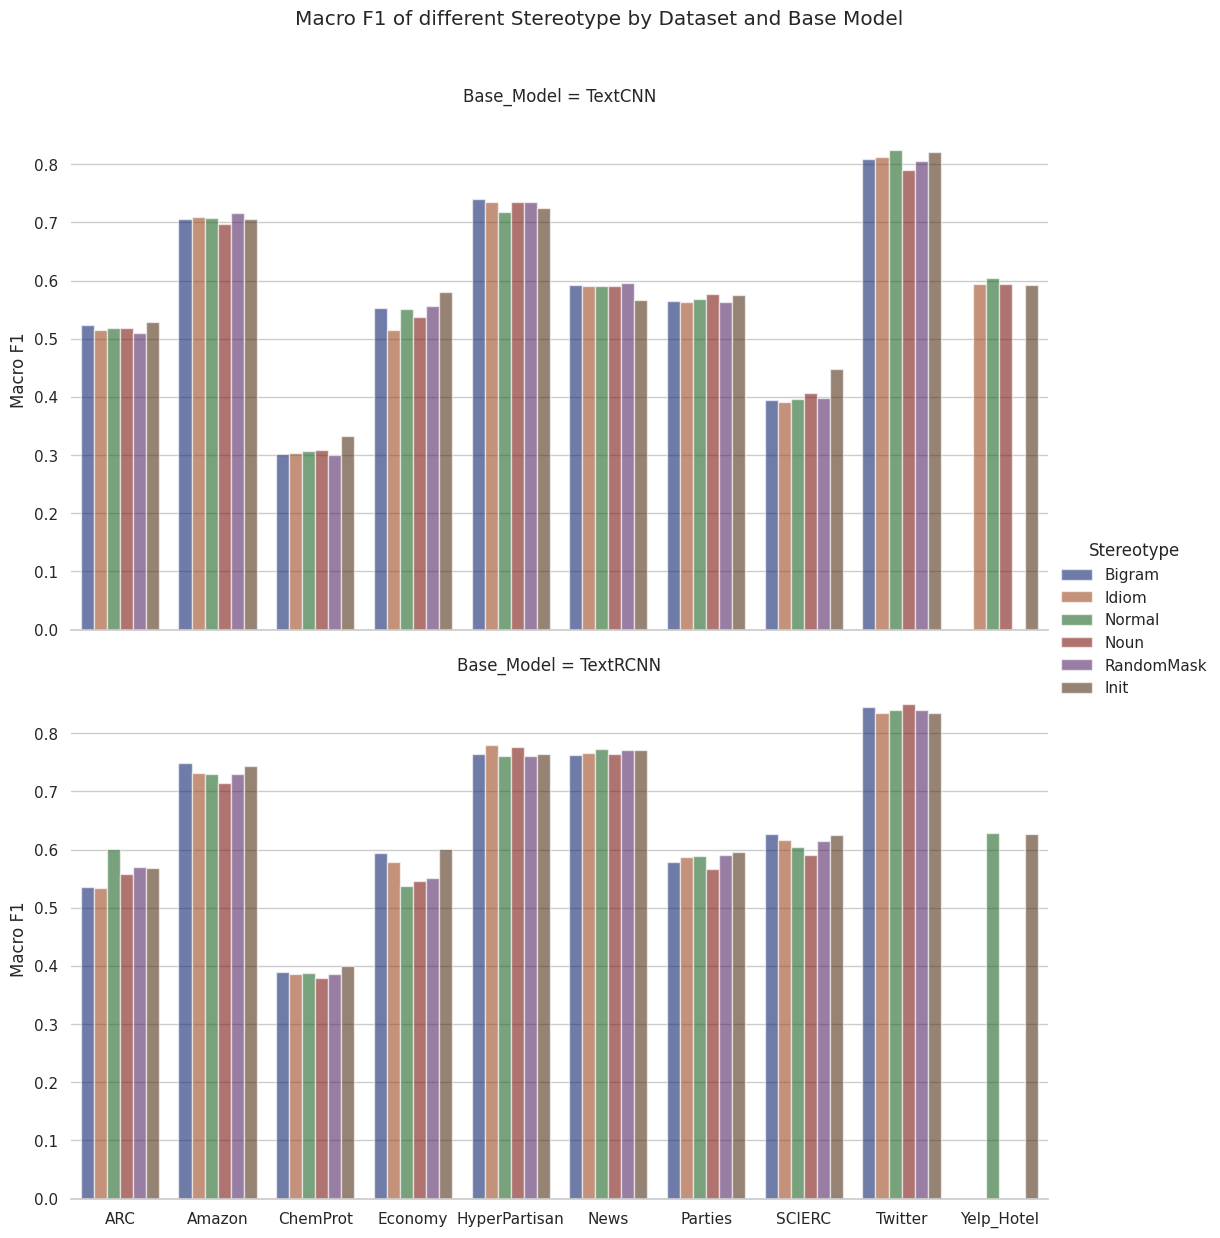

In [38]:
# Plot a graph of with horizontal axis is group by Dataset_Name and Base_Model and vertical axis is F1 Accuracy of different Stereotype (Normal, Noun, Idiom, Imbword, Keyword) with each data point color as different color
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
# Draw a nested barplot by Stereotype and Dataset_Name
# join merged dataset with init dataset
# join the init results with the final results to compare the difference
merged = merged.join(df_init.set_index(['Base_Model','Dataset_Name']), on=['Base_Model','Dataset_Name'], rsuffix='_init')
# split the grid plots in vertical direction
g = sns.catplot(
    data=merged, kind="bar",
    x="Dataset_Name", y="FinalF1", hue="Stereotype", row="Base_Model",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=1.8
)



g.despine(left=True)
g.set_axis_labels("", "Macro F1")
g.legend.set_title("Stereotype")
# g.set_xticklabels(rotation=45)

plt.suptitle('Macro F1 of different Stereotype by Dataset and Base Model', y=1.05)
plt.show()


# Plot the training process

In [41]:
# plot the training graph

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
# read csv without index column
train_df = pd.read_csv('../result/csv/train1.csv', index_col=False)
print(f"len of train_df: {len(train_df)} before drop duplicates")
# show duplicated rows
train_df[train_df.duplicated()]
train_df = train_df.drop_duplicates()
# change all steretype of Keyword to Bigram
train_df.loc[train_df['Stereotype'] == 'Keyword', 'Stereotype'] = 'Bigram'

# join data with init results
df_init = pd.read_csv('../result/csv/init_results.csv')
train_df = train_df.join(df_init.set_index(['Base_Model','Dataset_Name']), on=['Base_Model','Dataset_Name'], rsuffix='_init')

group_df = train_df.groupby(['Dataset_Name','Base_Model','Stereotype'])
group_df
# check if all "Keyword" Stereotype has NGRAM = 2



len of train_df: 1480 before drop duplicates


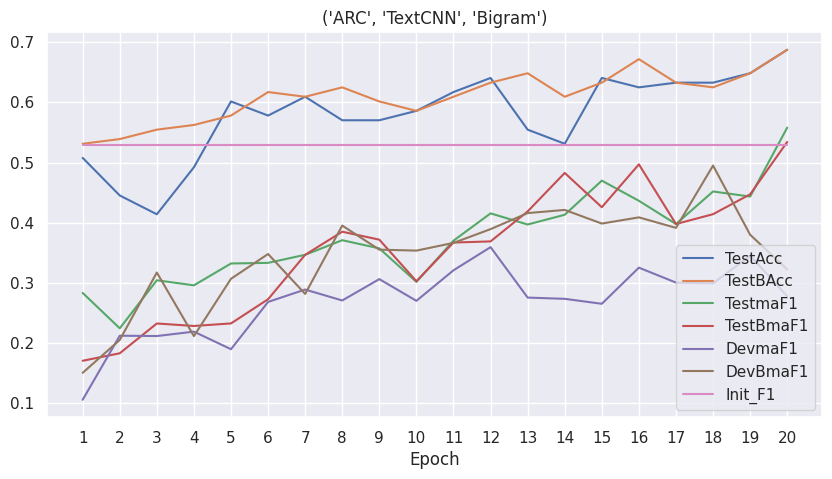

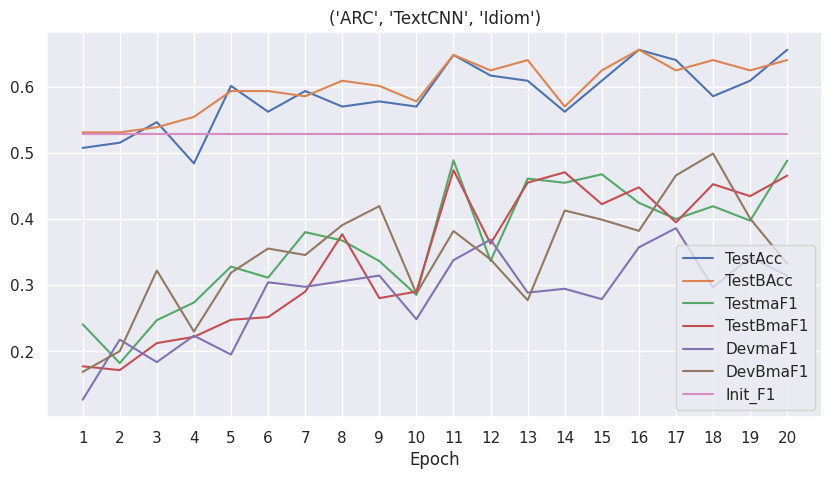

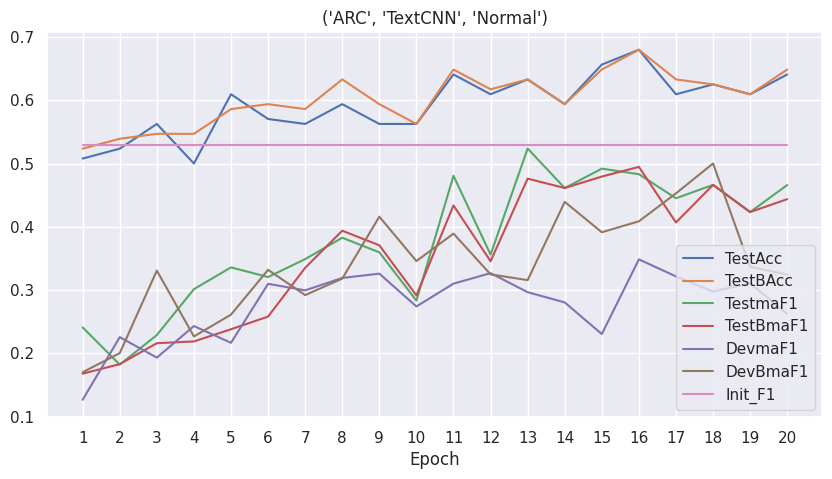

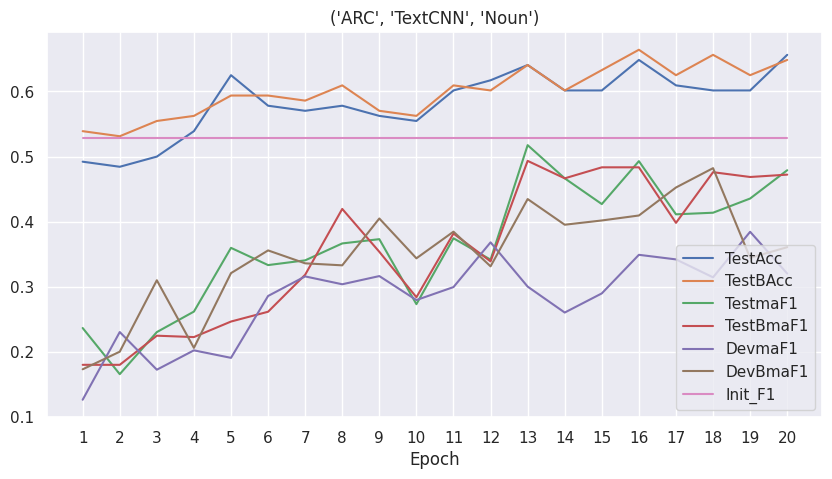

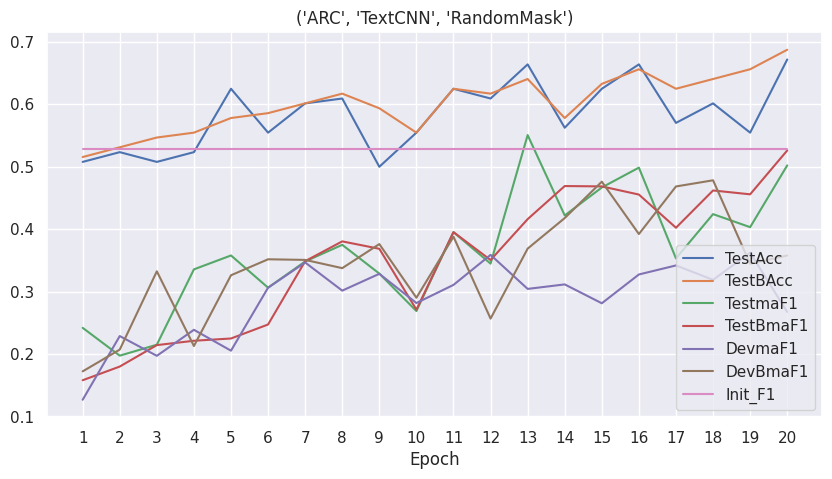

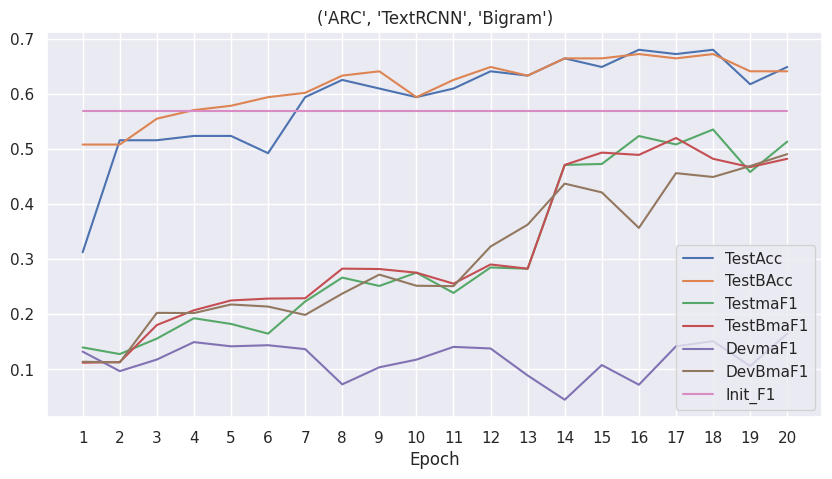

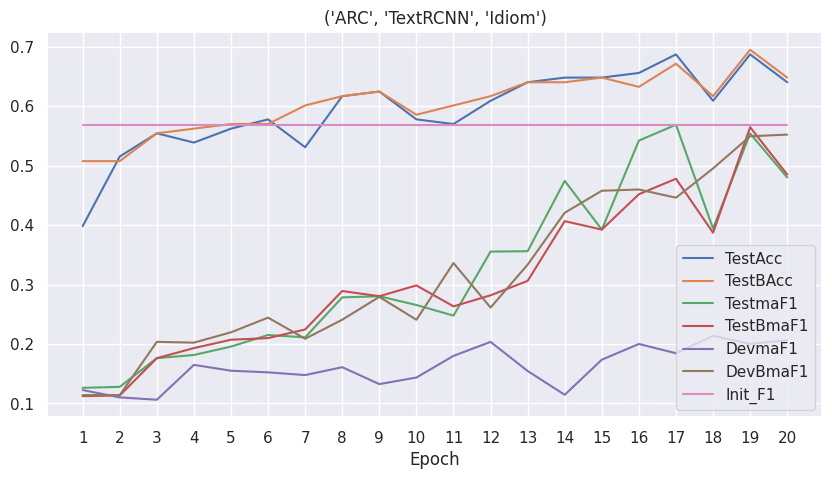

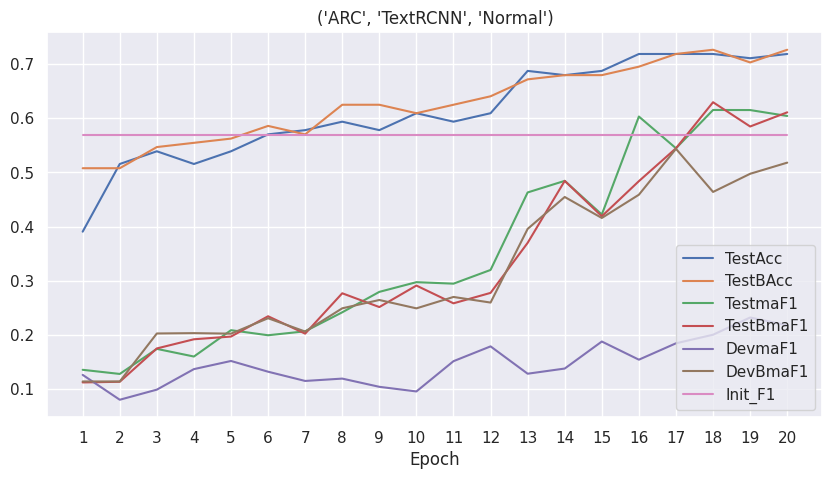

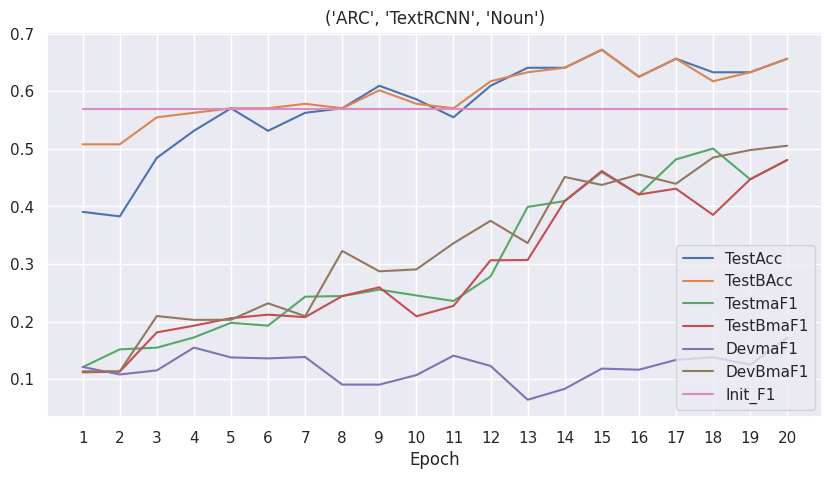

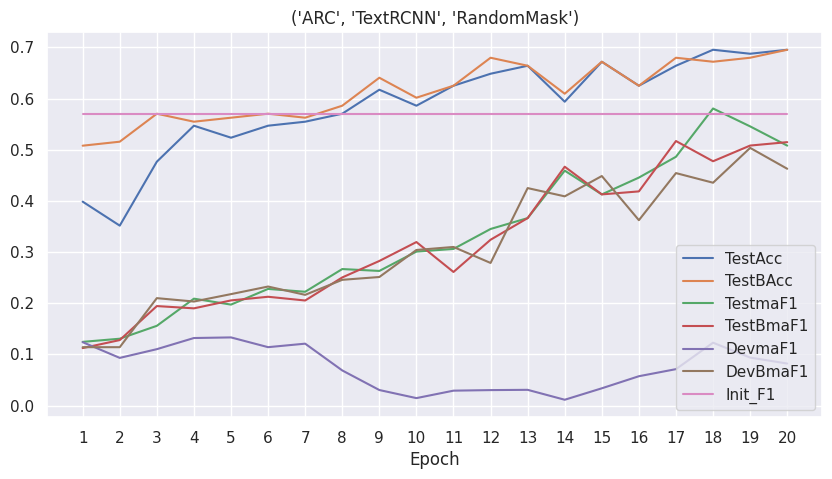

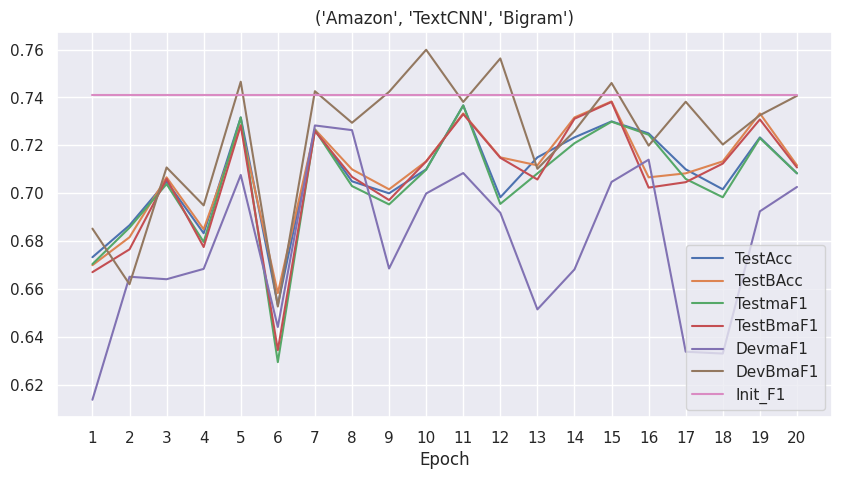

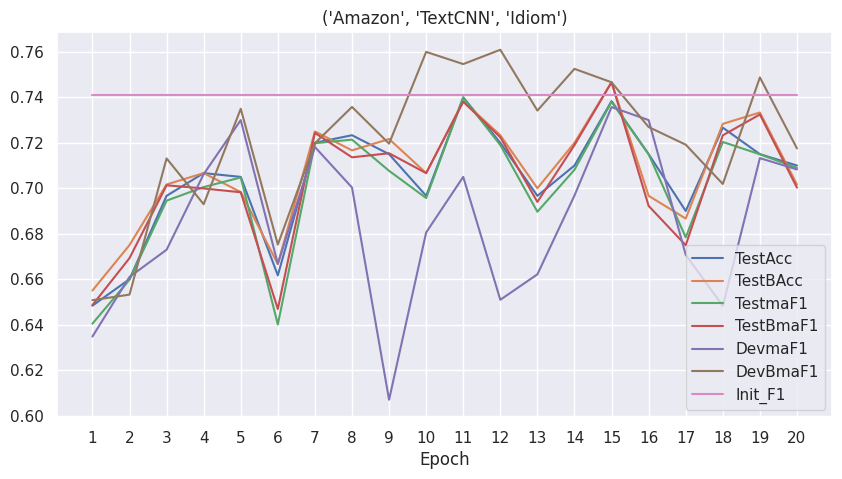

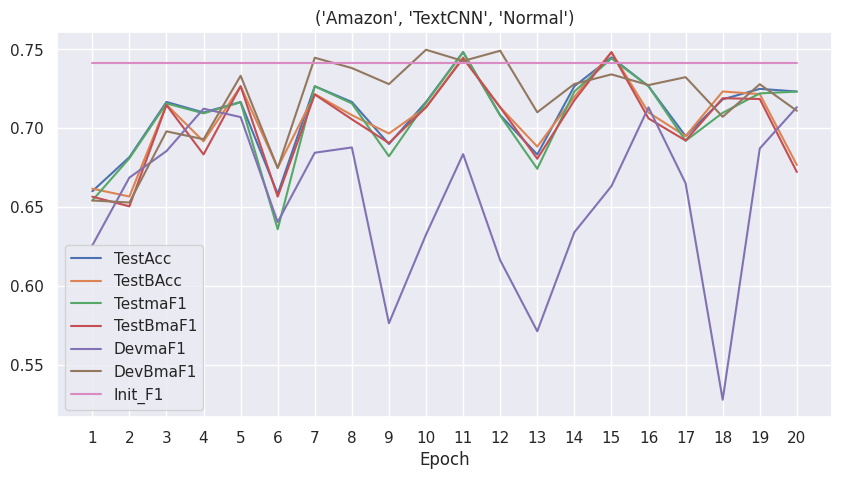

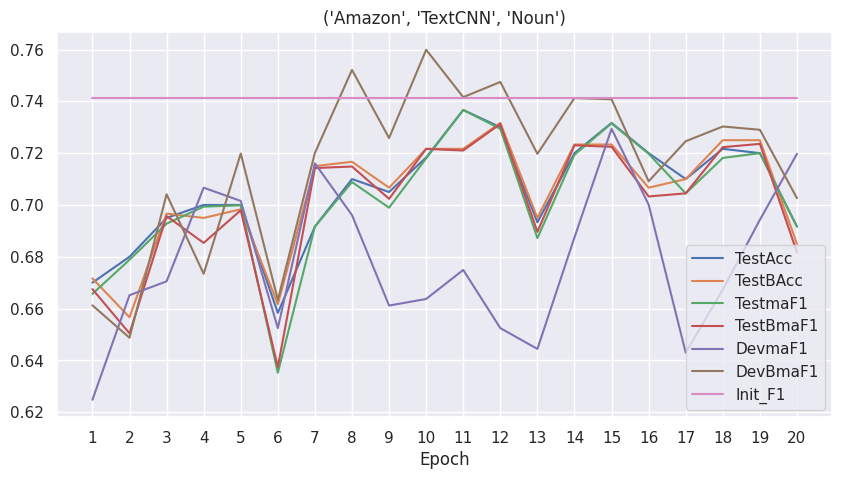

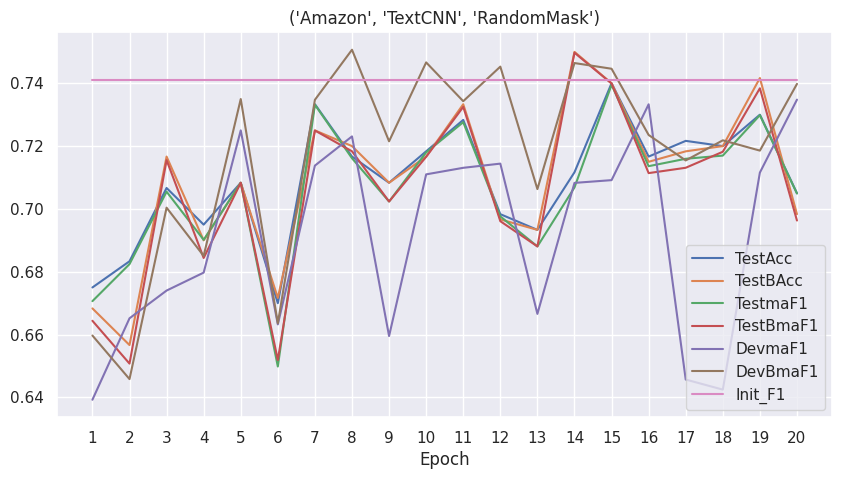

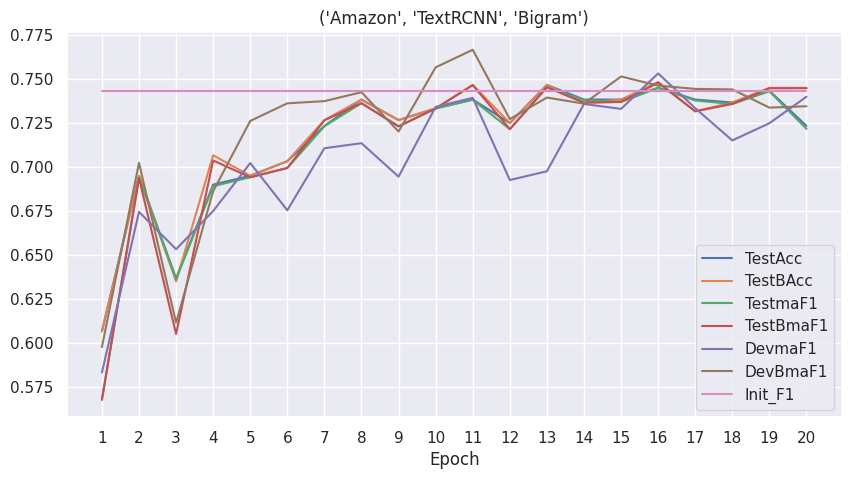

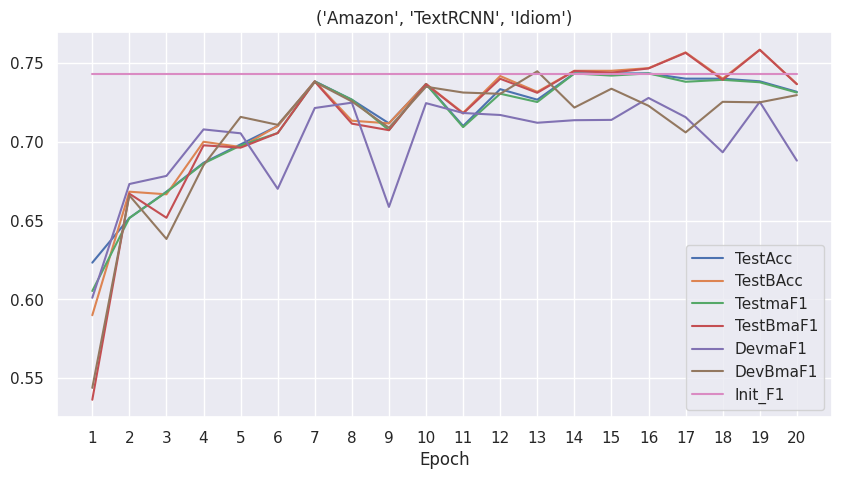

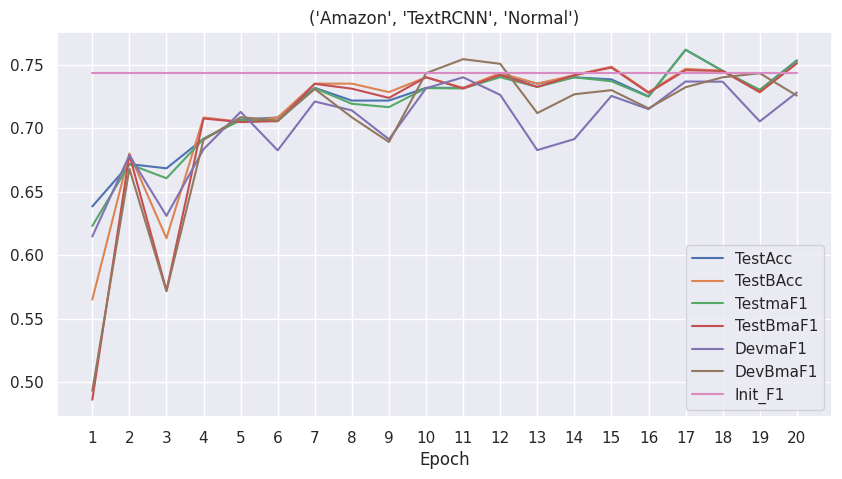

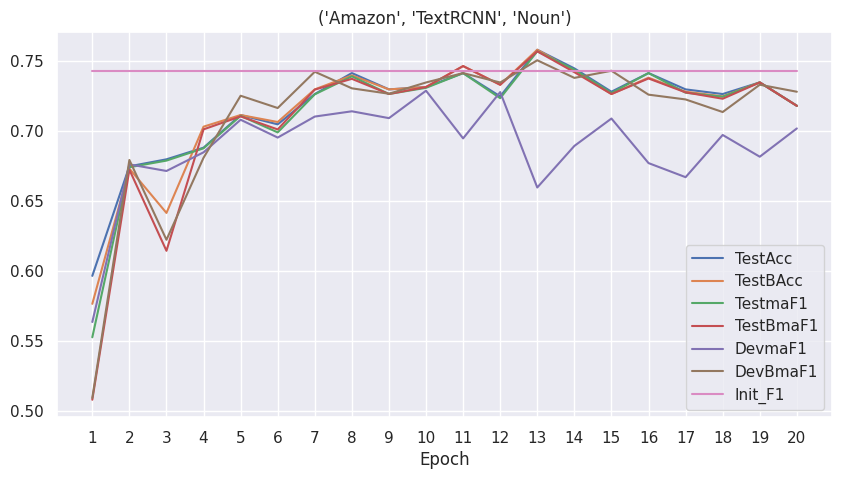

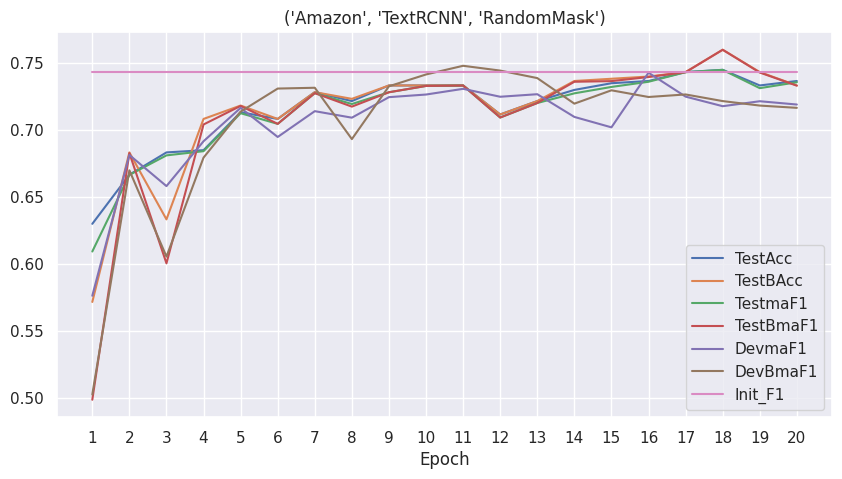

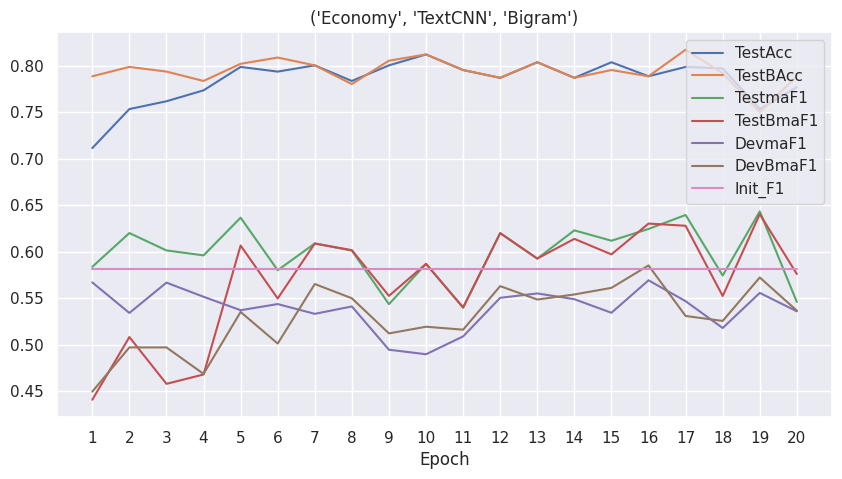

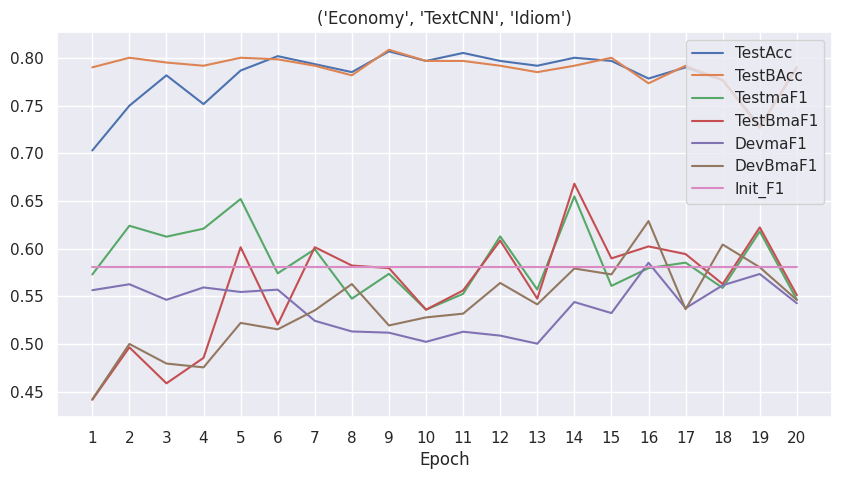

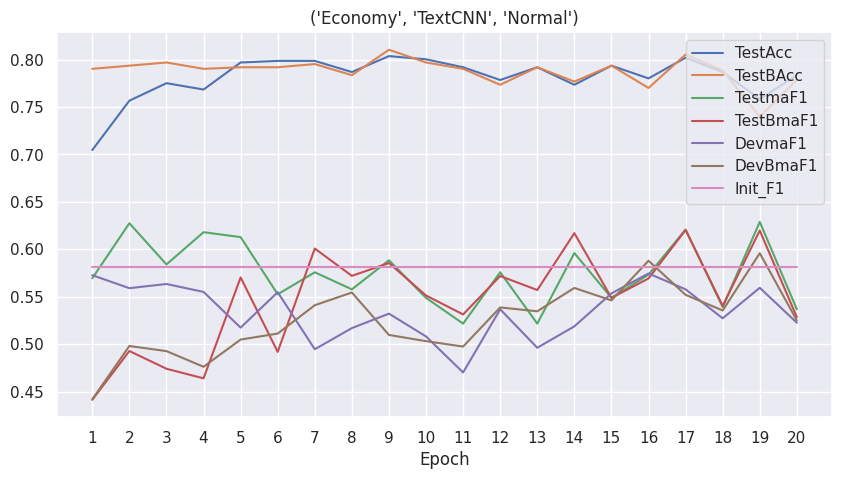

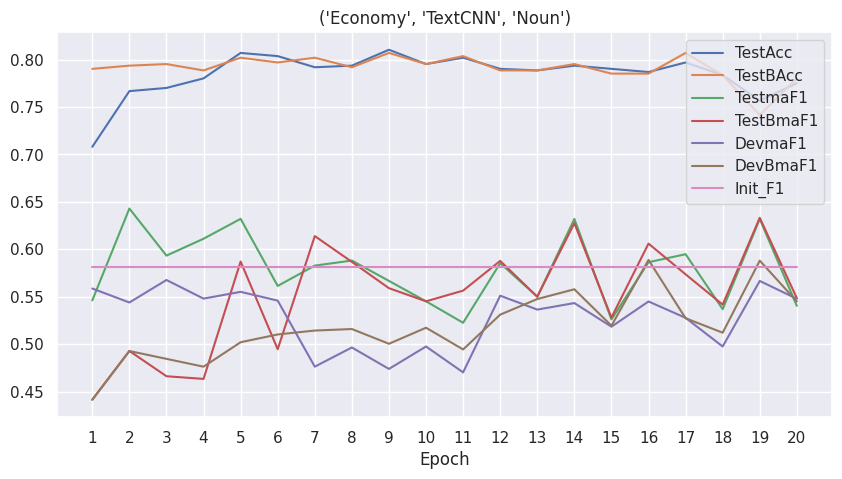

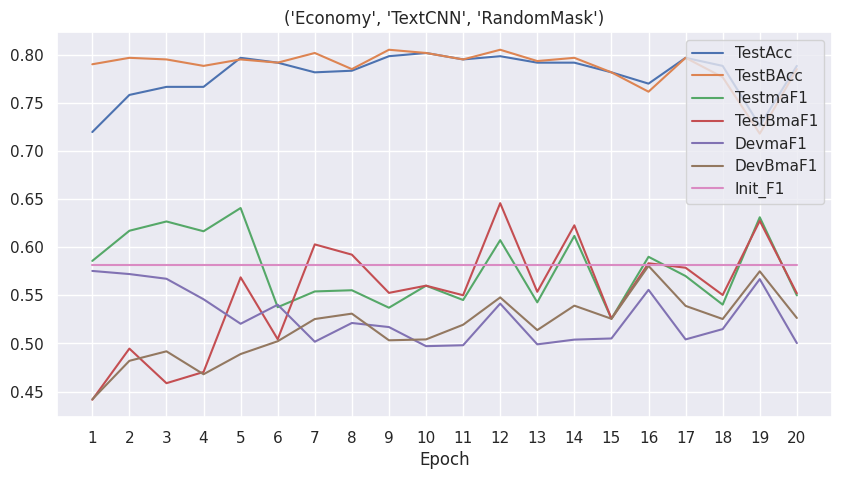

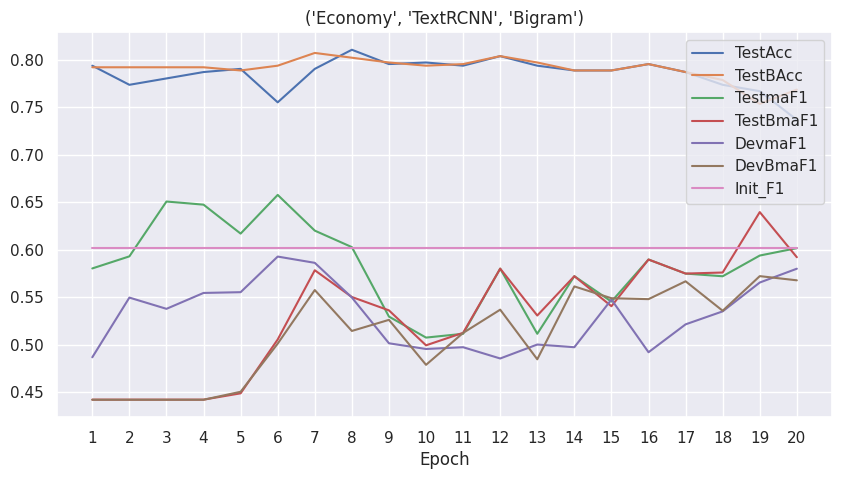

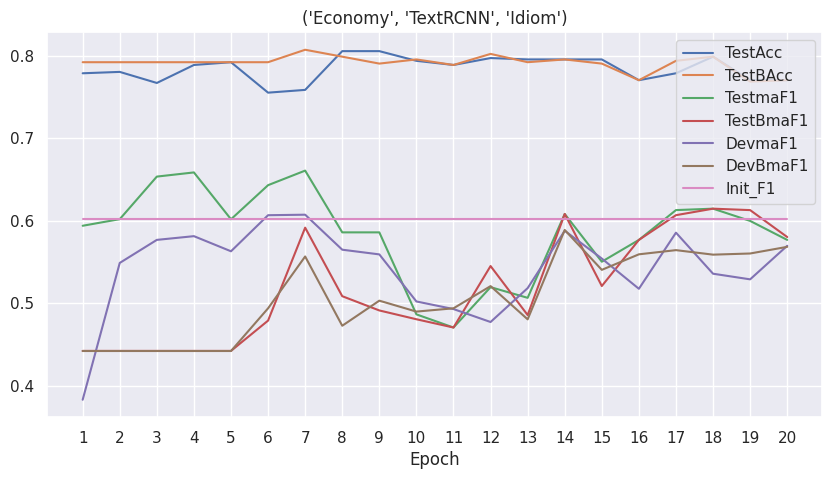

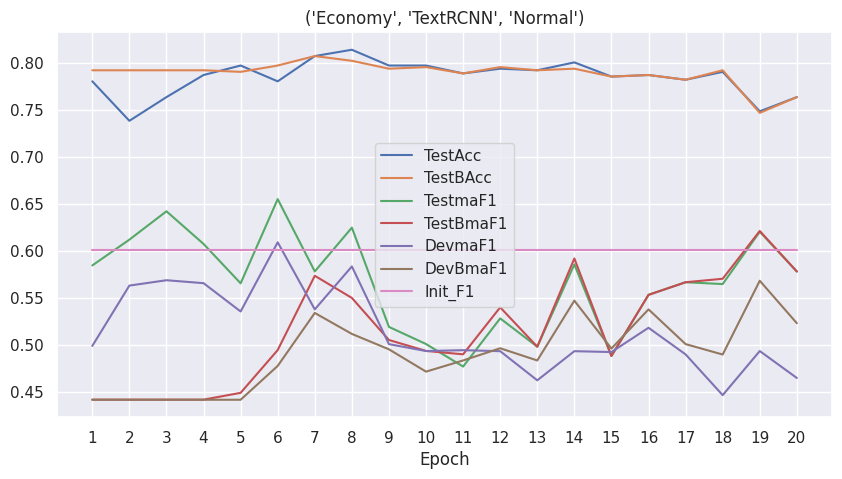

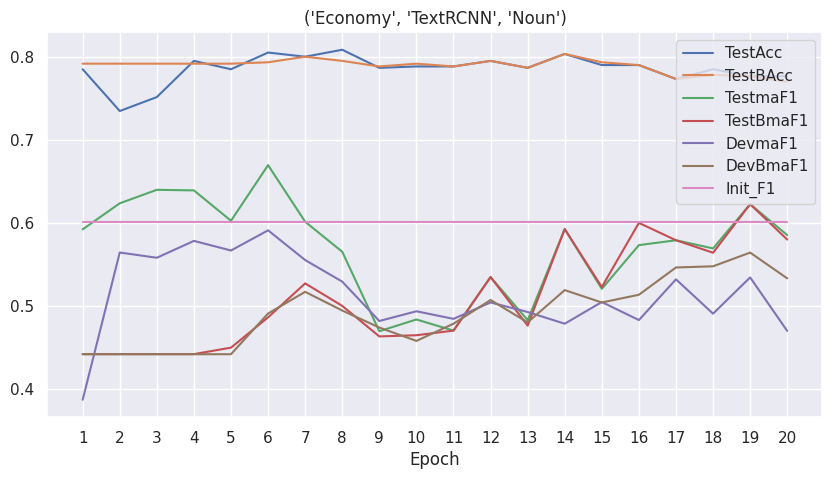

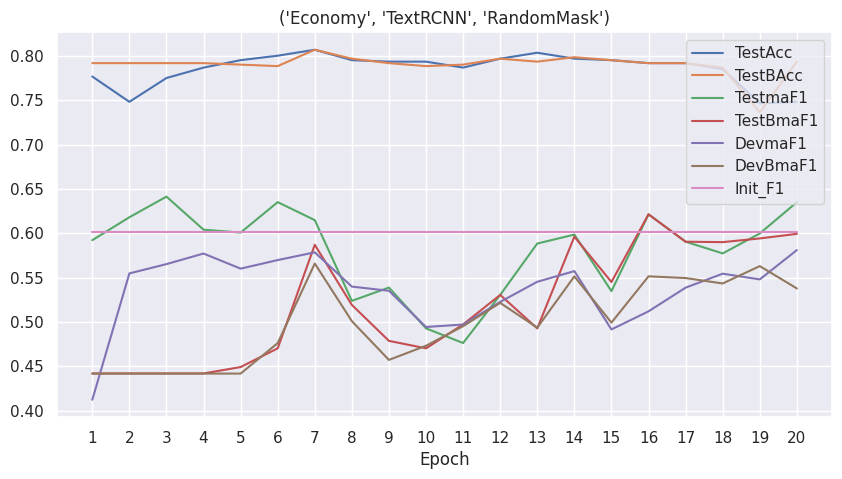

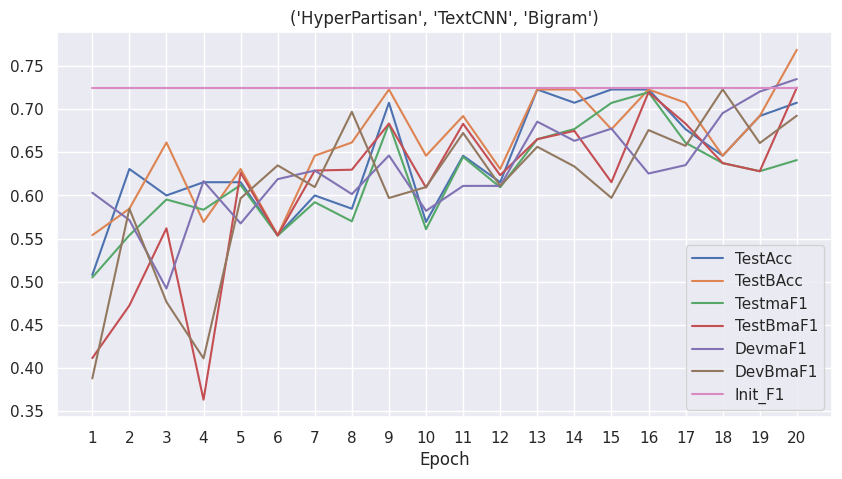

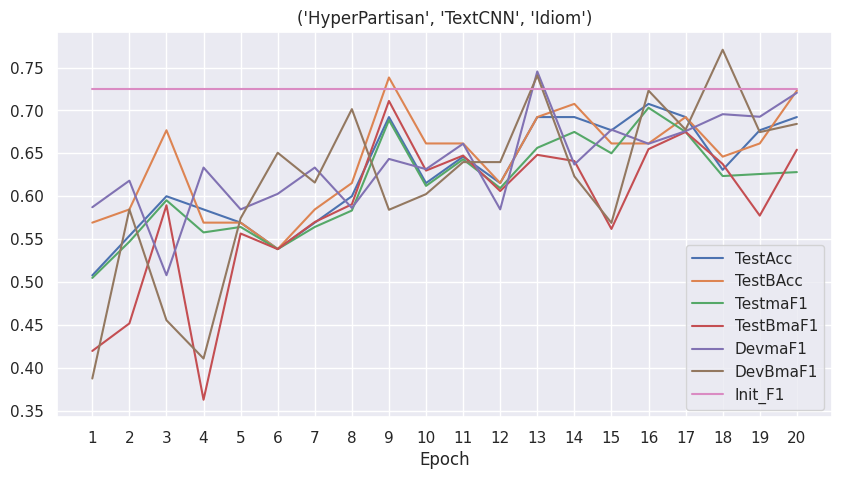

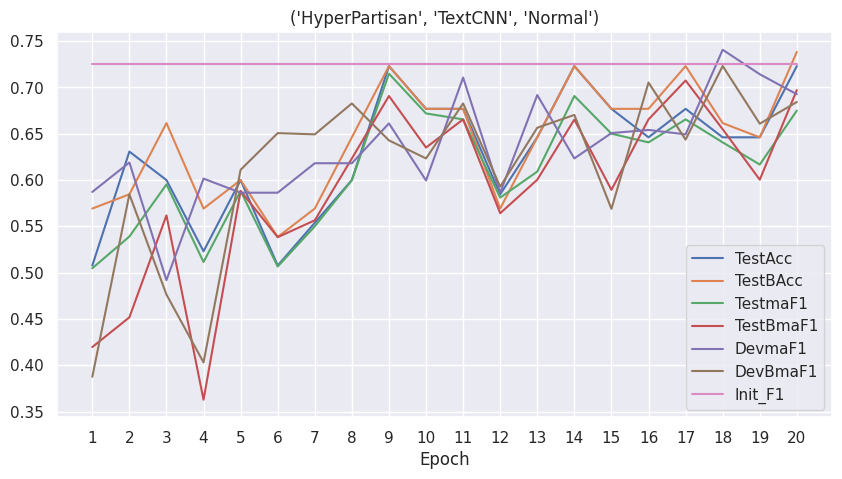

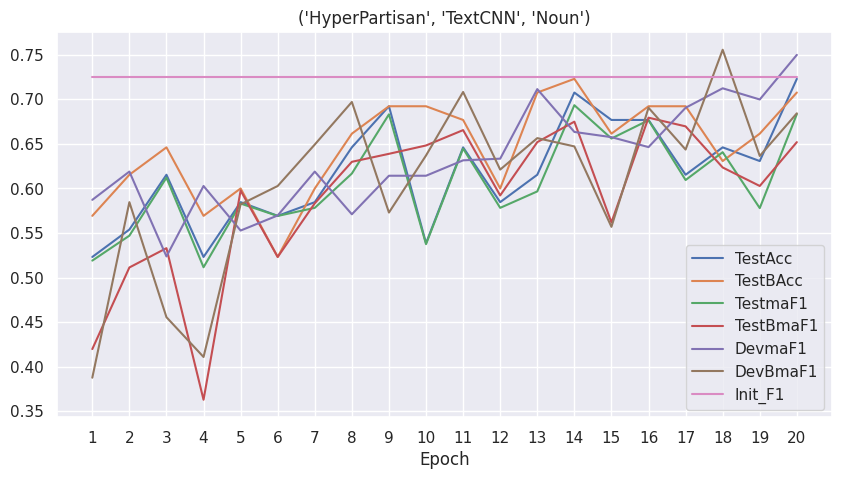

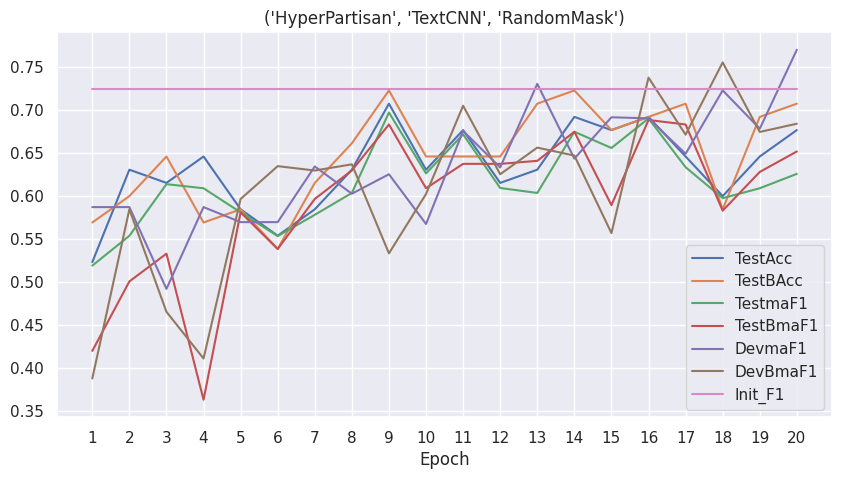

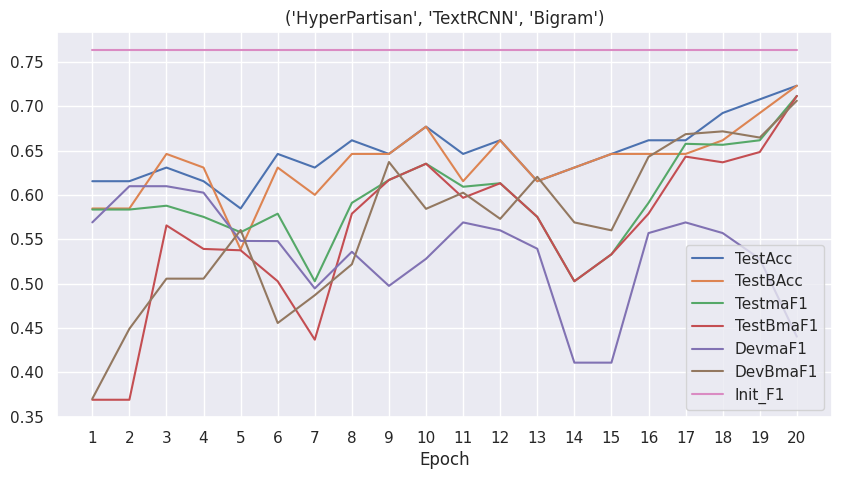

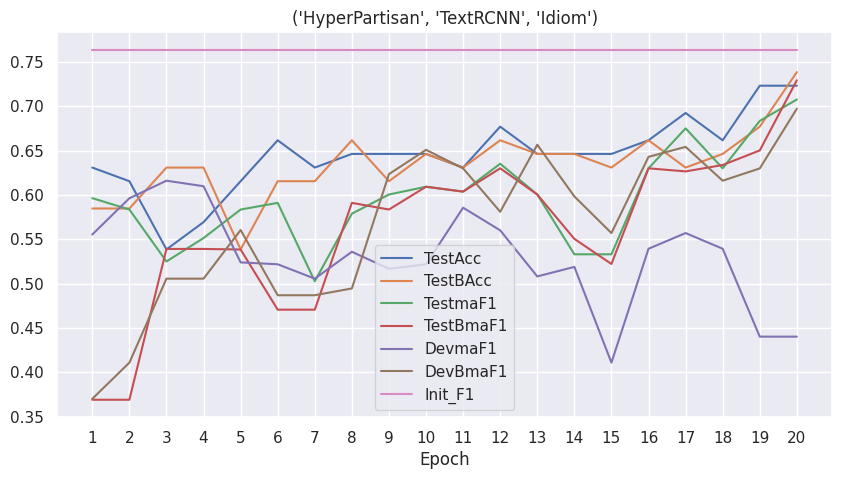

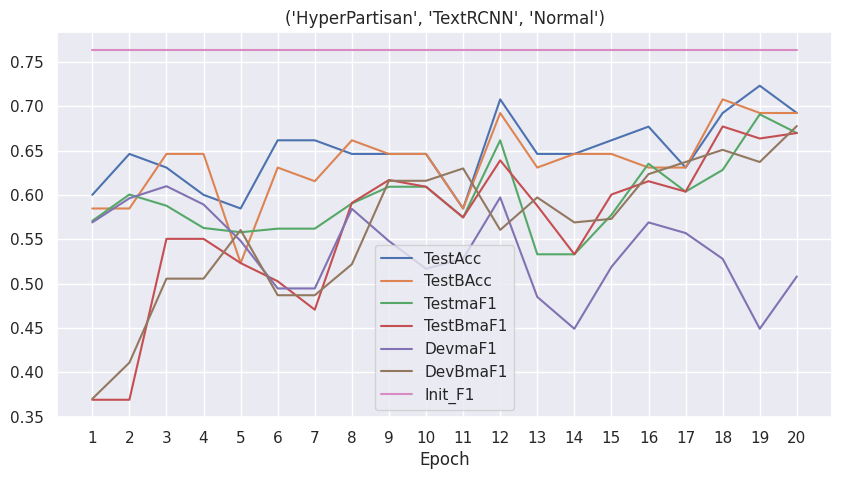

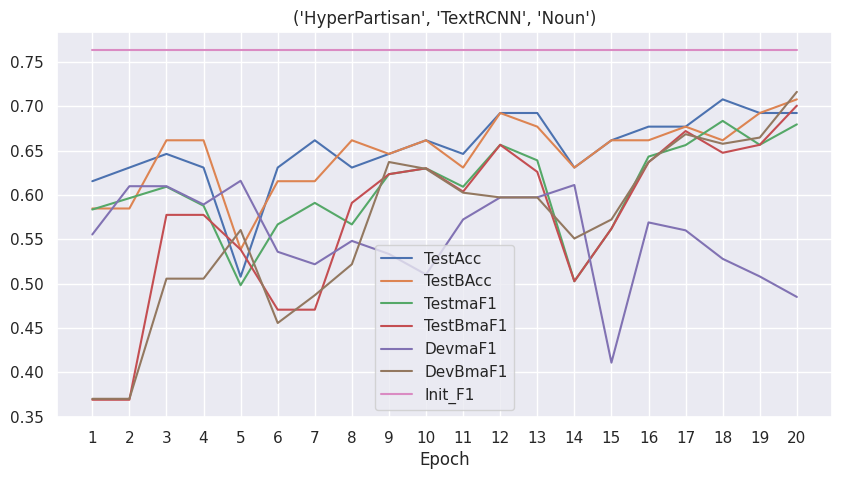

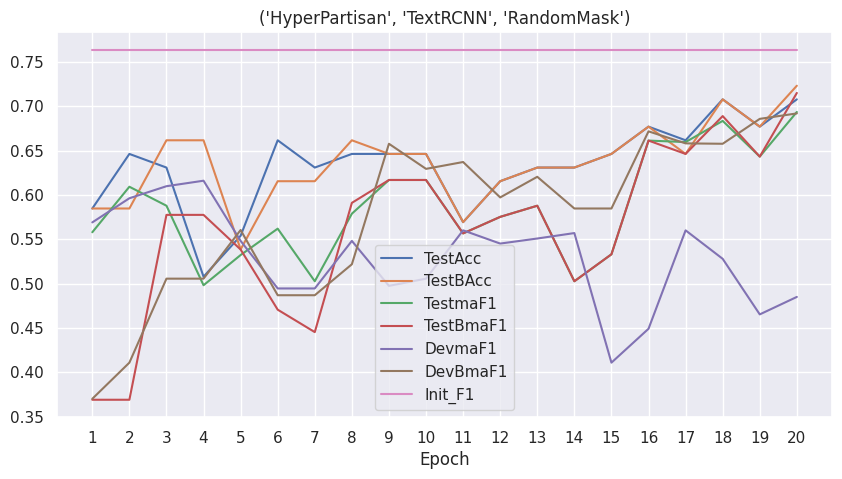

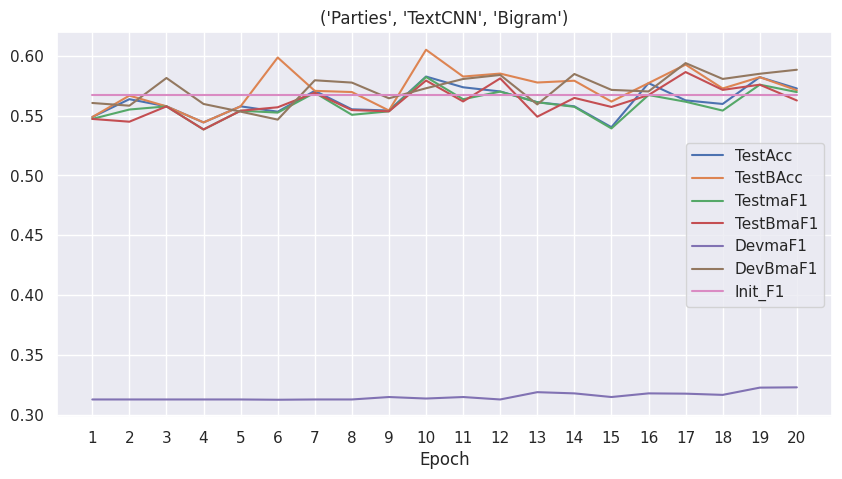

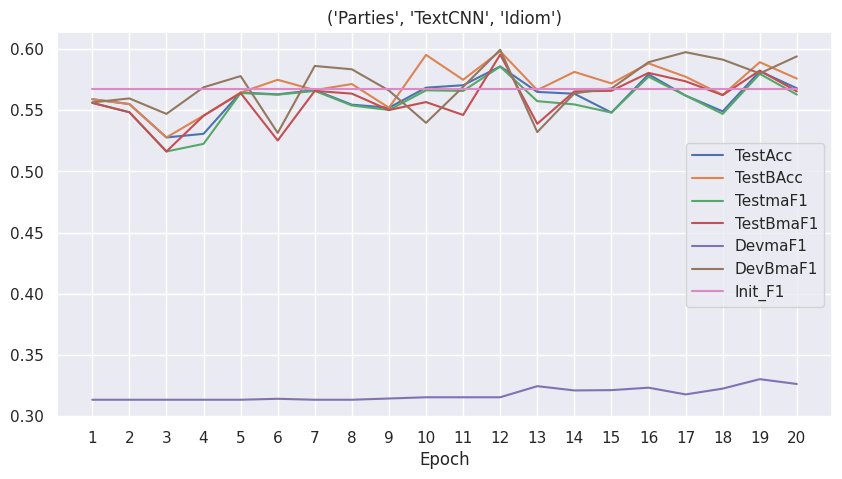

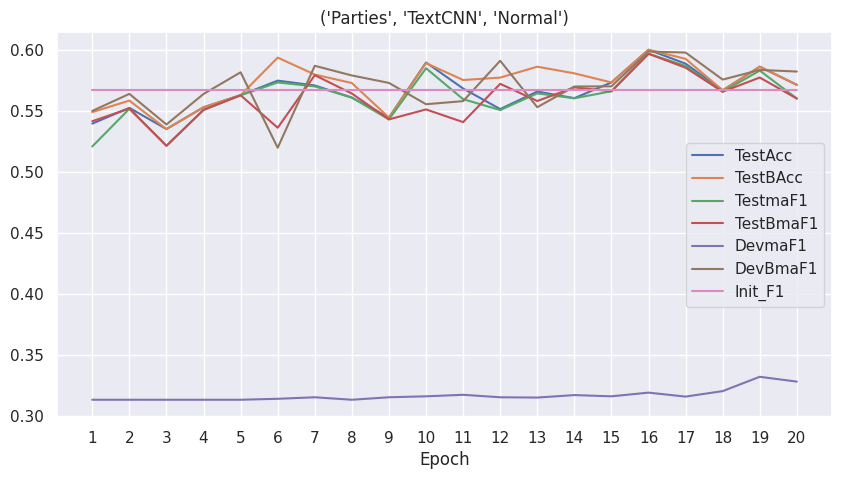

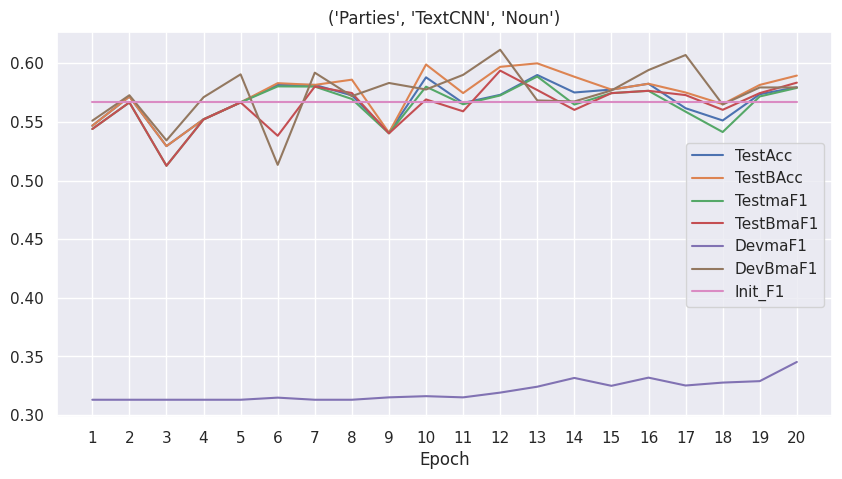

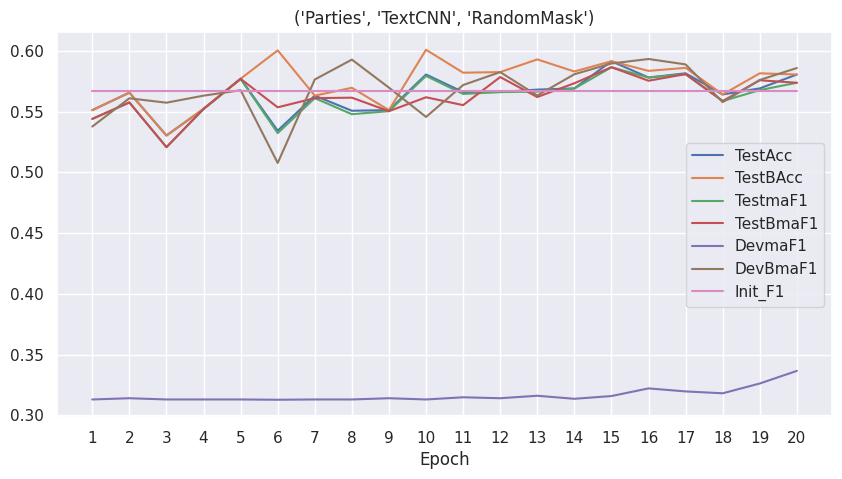

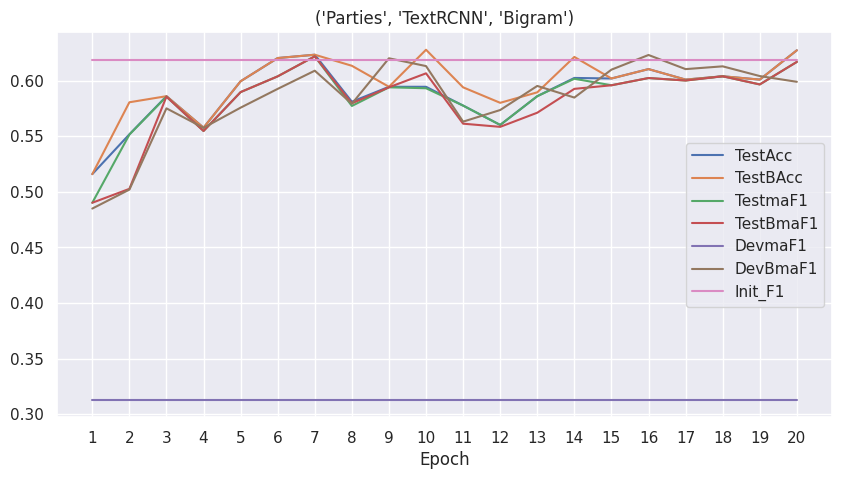

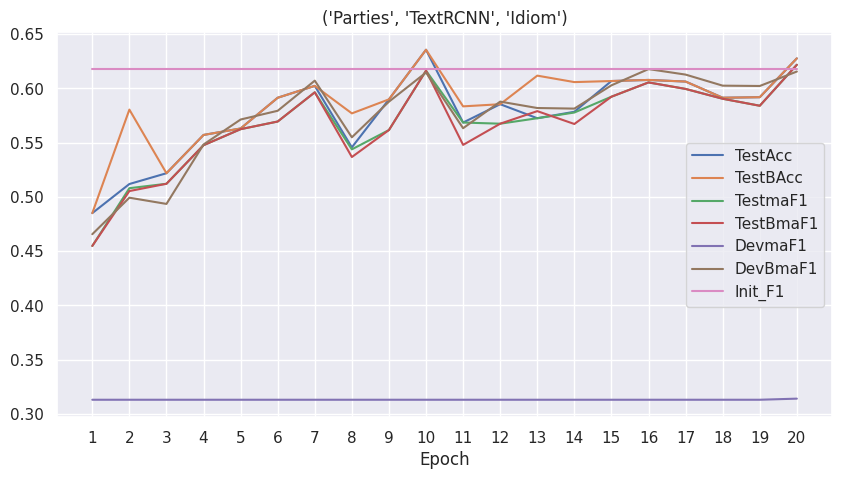

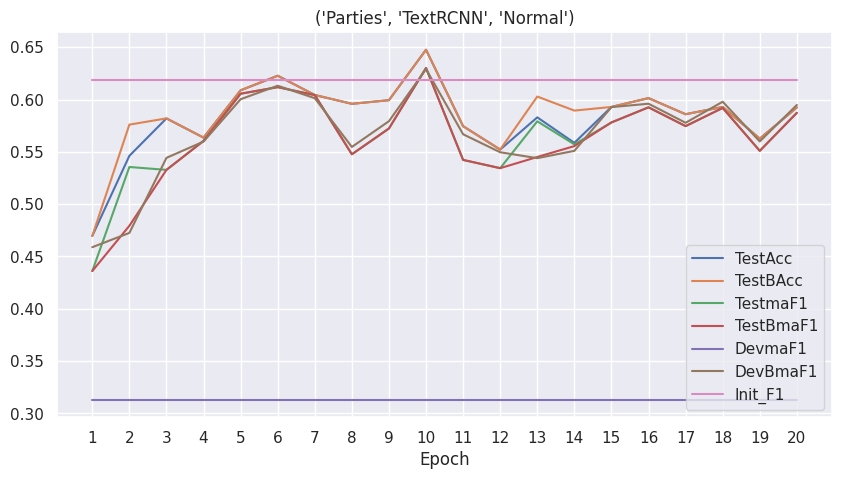

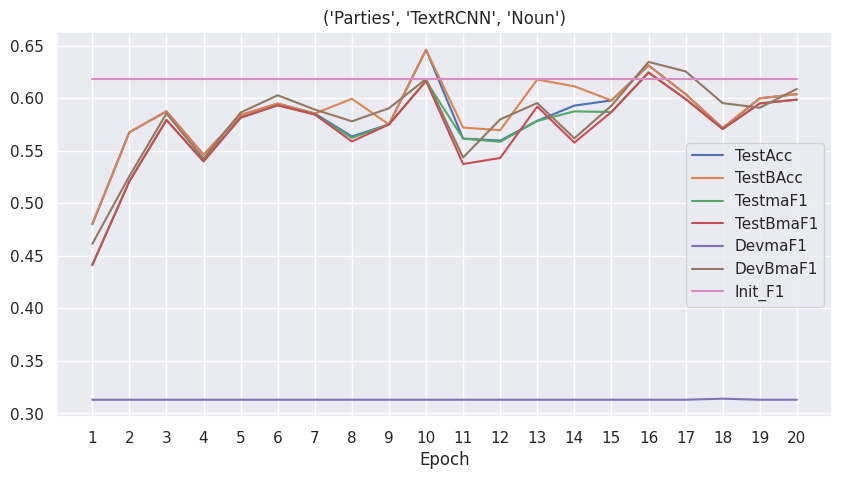

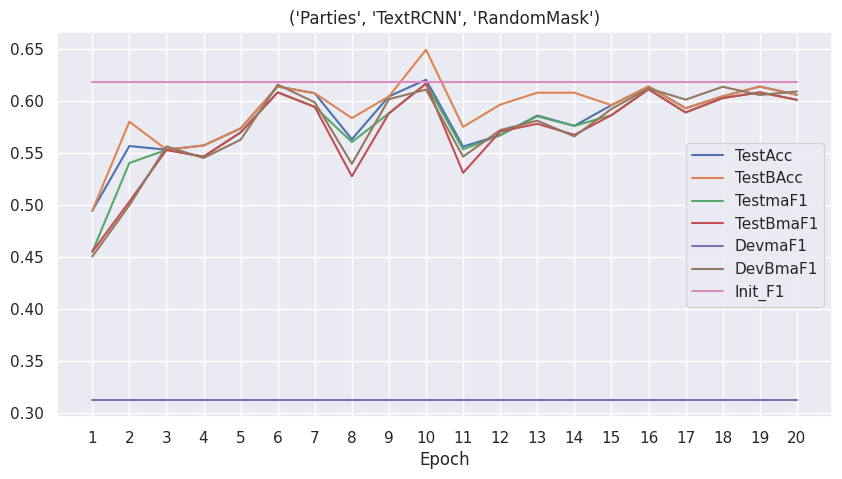

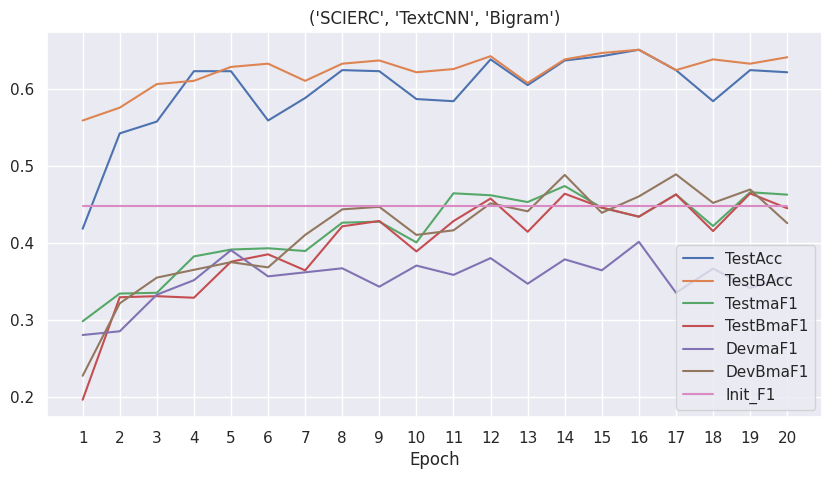

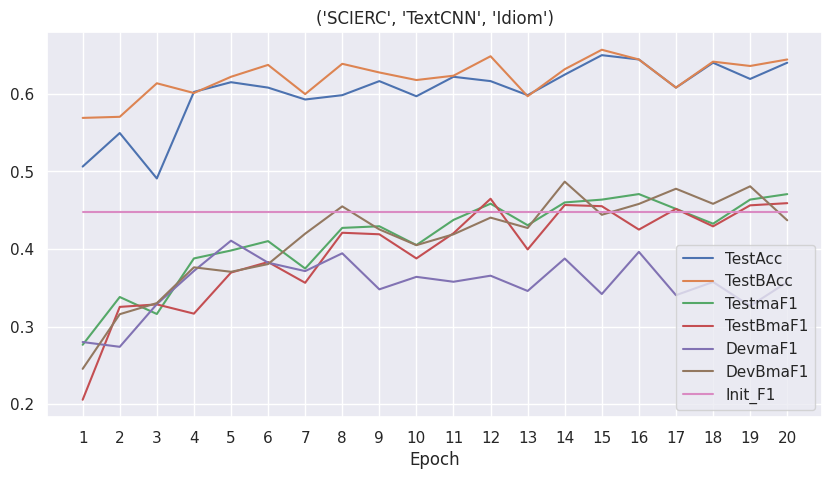

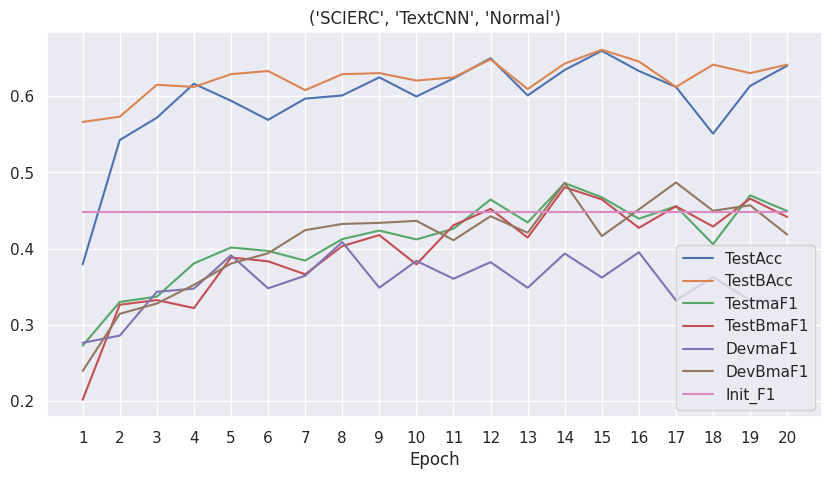

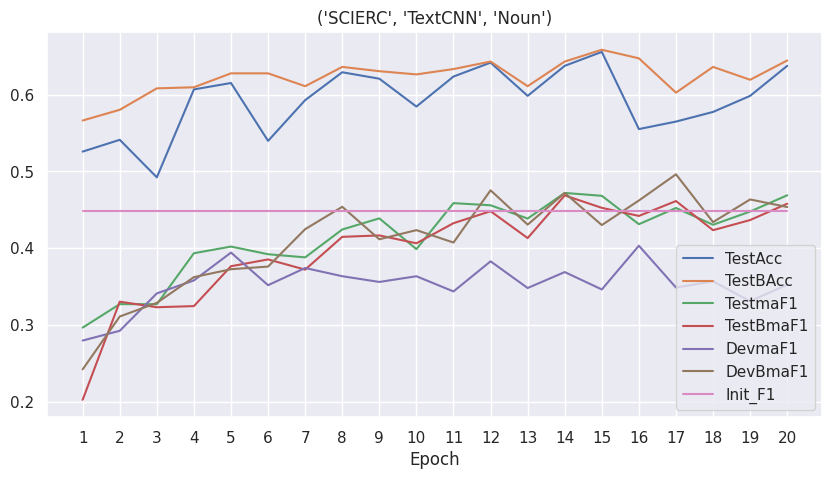

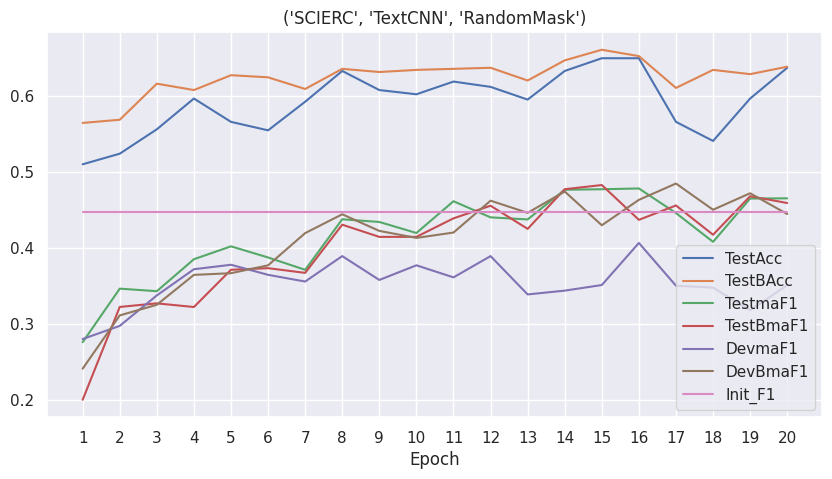

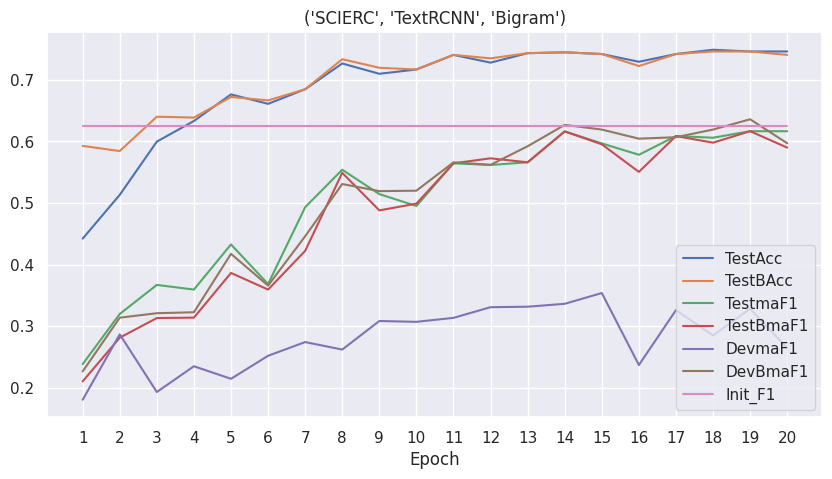

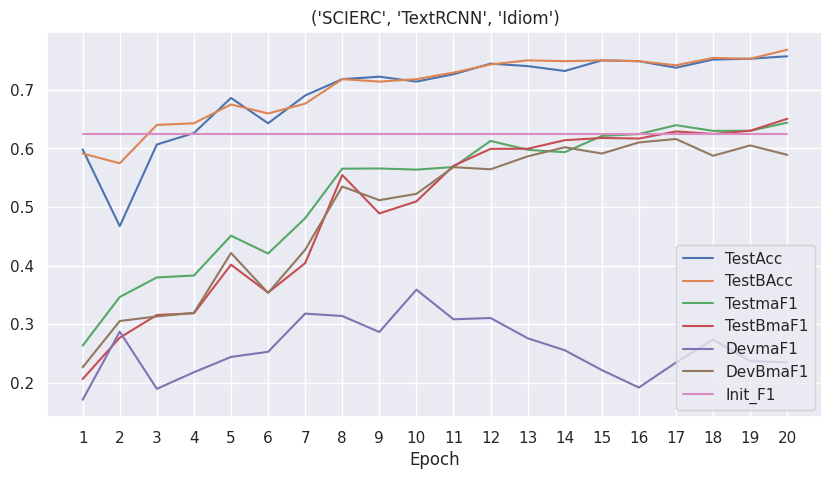

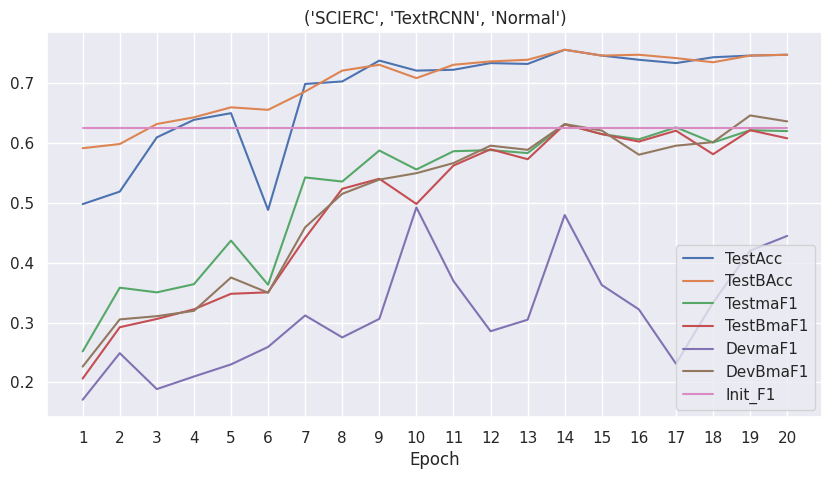

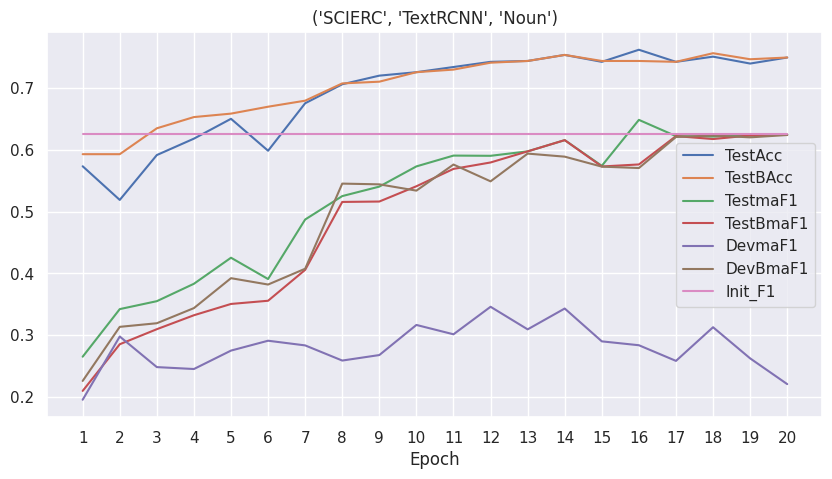

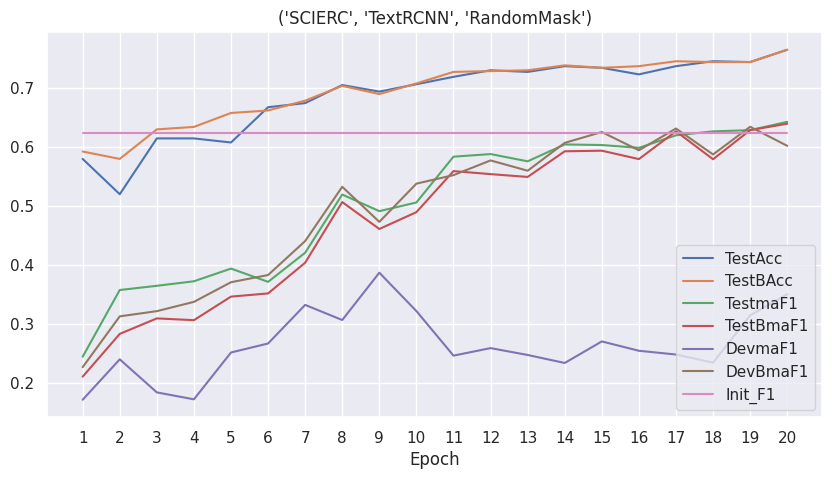

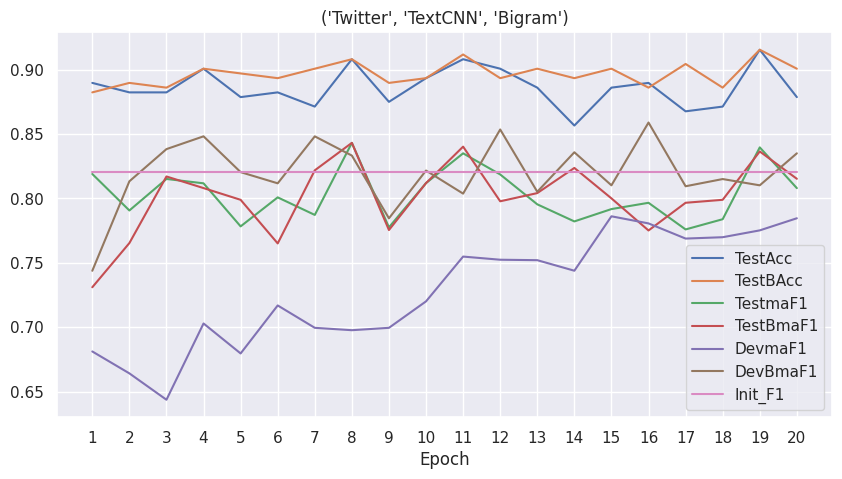

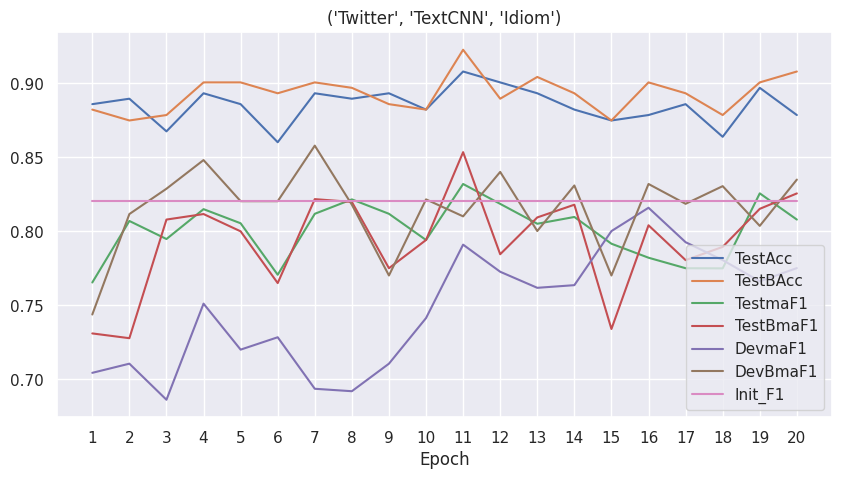

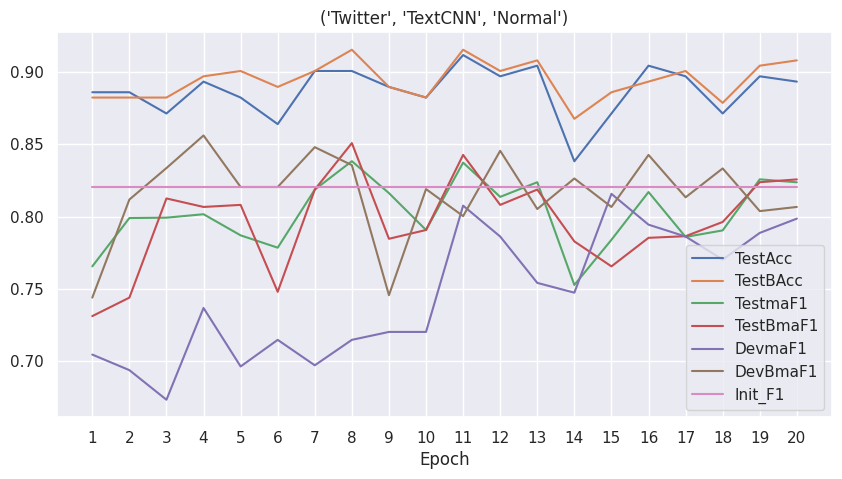

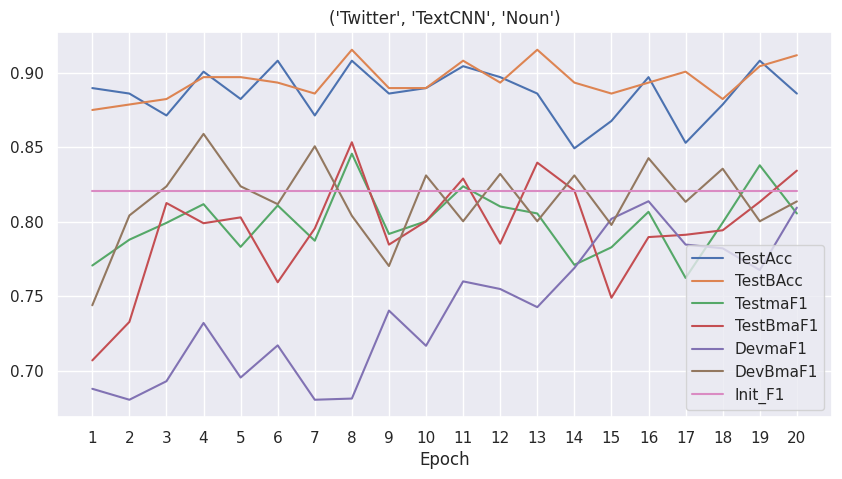

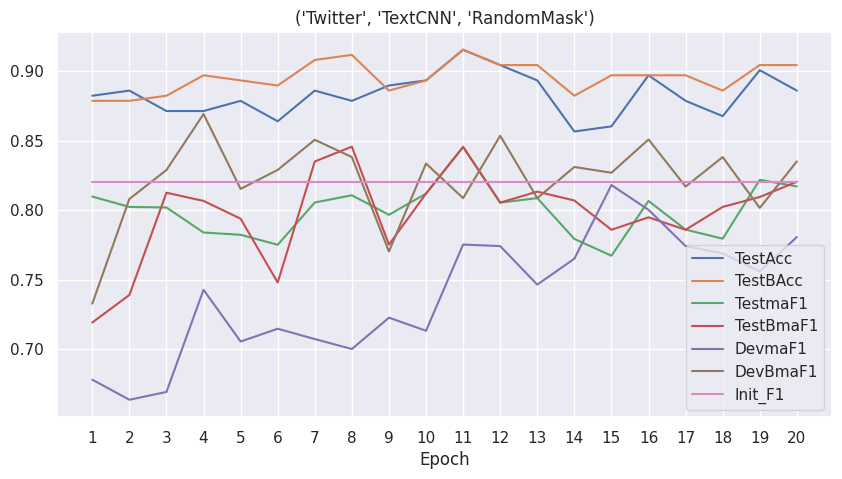

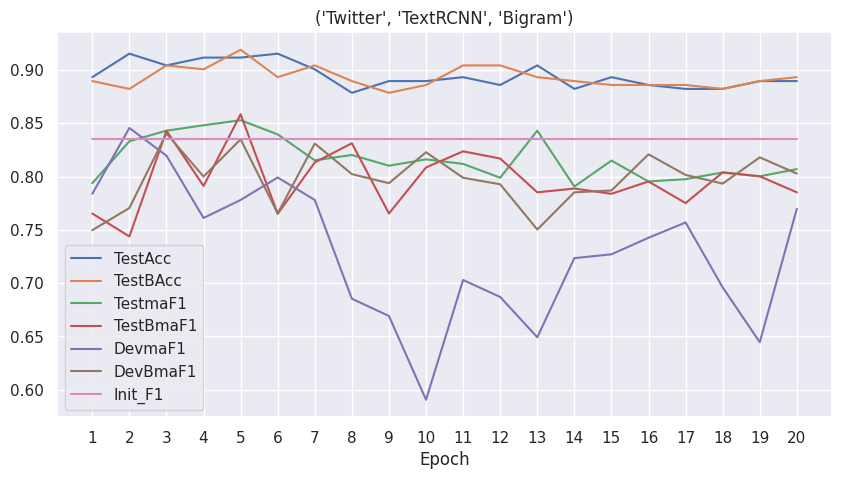

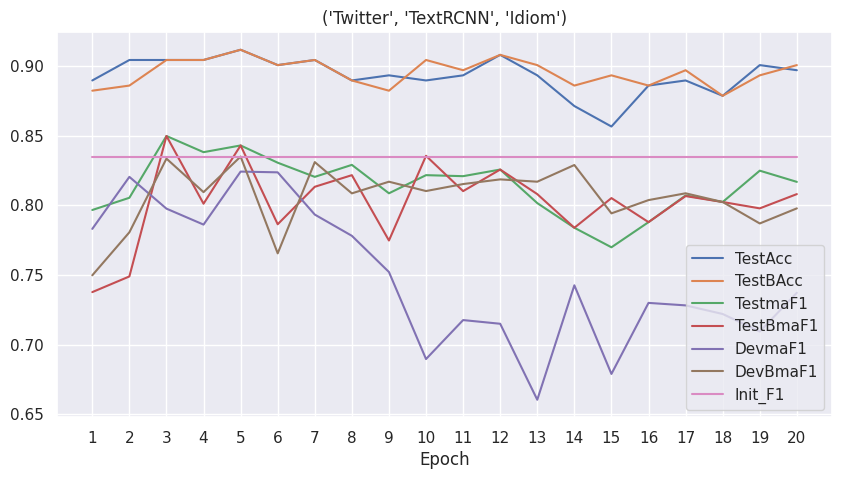

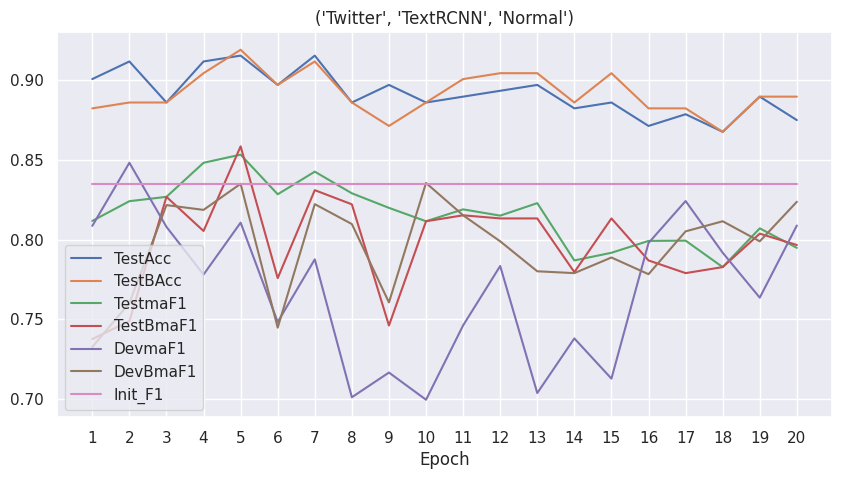

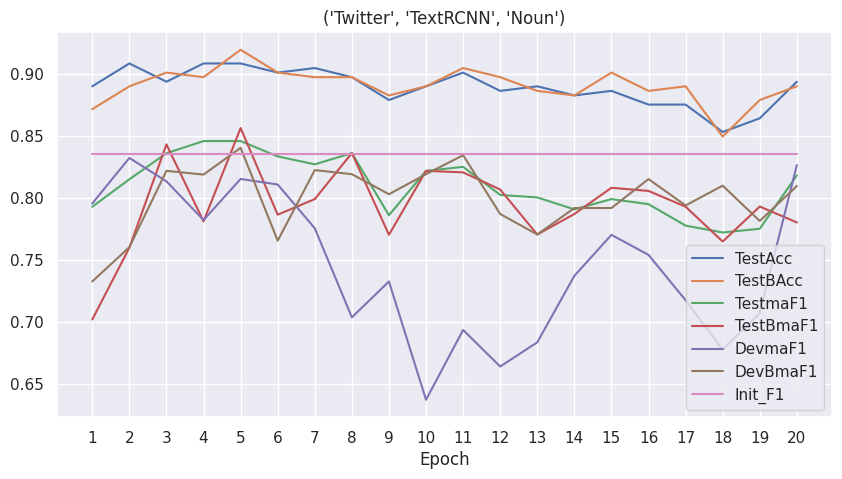

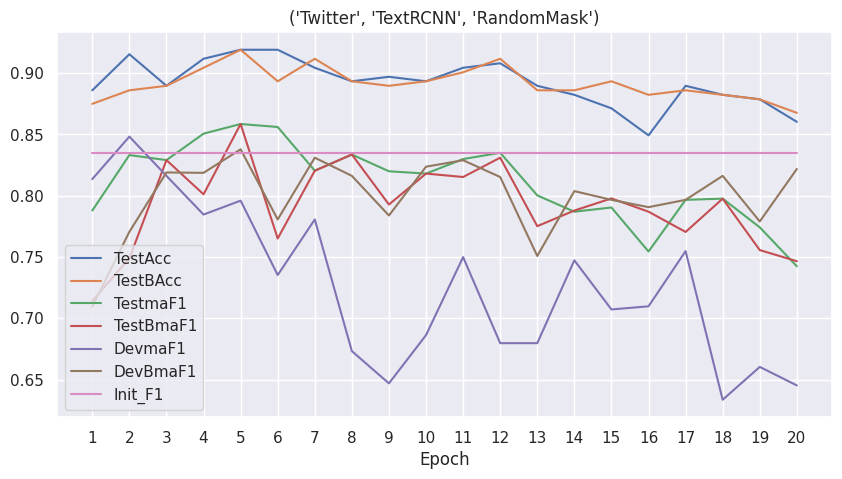

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Ensure DataFrame is sorted by 'mark'
train_df = train_df.sort_values('Epoch')

# Group DataFrame
grouped = train_df.groupby(['Dataset_Name', 'Base_Model', 'Stereotype'])

# For each group, create a separate line plot for each numerical column
for name, group in grouped:
    # print(name)
    plt.figure(figsize=(10, 5))  # Adjust figure size as needed
# plot for all columns TestAcc,TestBAcc,TestmaF1,TestBmaF1,DevmaF1,TestDevmaF1,FactualKeywordFairness,CounterfactualKeywordFairness
    for column in ["TestAcc","TestBAcc","TestmaF1","TestBmaF1","DevmaF1","DevBmaF1","Init_F1"]:
        # make sure the x asis is integer
        # make sure the plot x asis is mark by integer value
        x = group['Epoch'].astype(int)
        plt.plot(x, group[column], label=column)
    plt.xticks(x)
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
